# Problem Statement: Hotel Performance and Revenue Analysis for Altiq Grands Hotels
<br>

## Objective:

#### To analyze historical booking data from Altiq Grands hotels to evaluate their performance and revenue generation. The primary focus is on understanding how various factors affect hotel performance and revenue, identifying key drivers, and developing strategies for optimization.
<br>

## Scope:

#### The analysis will concentrate on assessing the performance and revenue of Altiq Grands hotels, examining how different factors influence these metrics, and providing actionable recommendations to enhance overall performance and revenue.
<br>

## Key Questions:

#### KPI Monitoring: What key performance indicators (KPIs) should be monitored to effectively assess the performance and revenue of Altiq Grands hotels? How can these KPIs be used to guide strategic decisions and drive improvements in revenue management?

#### Hotel Performance and Revenue Metrics: How have revenue, occupancy rates, and average ratings evolved over time for Altiq Grands hotels across different properties and cities? What are the key performance metrics for each property within the Altiq Grands portfolio, and how do they contribute to the overall revenue?

#### Impact of Different Factors on Performance and Revenue: How do factors such as booking lead time, room type, booking platform, and stay duration impact revenue and performance at Altiq Grands hotels? Are there specific trends or patterns that highlight which factors most significantly affect revenue and performance?

#### Factors Affecting Revenue: Which factors are most influential in driving revenue generation for Altiq Grands hotels? How do these factors interact to impact overall revenue? What are the key drivers of high or low revenue performance across different properties within the Altiq Grands chain?

#### Predictive Modeling and Analysis: How can predictive models be utilized to forecast revenue and performance based on various influencing factors for Altiq Grands hotels? What features are most important for predicting revenue and performance, and how can these insights be applied to optimize hotel operations?

#### Insights and Recommendations: What actionable insights can be derived from the analysis to improve hotel performance and revenue for Altiq Grands hotels? What strategies can be implemented to address the factors that negatively impact performance and revenue?

#### Import required modules

In [1]:
# Data manipulation modules

import pandas as pd
import numpy as np


# Data visualization modules

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

%matplotlib inline


# Ignore warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Visualization configurations

sns.set_style('darkgrid')
sns.set_palette('inferno')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 6)

In [3]:
# Dataframe configurations

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

In [4]:
# Load data


# Date data

dim_date = pd.read_csv('dim_date.csv')


# Hotel data

dim_hotels = pd.read_csv('dim_hotels.csv')


# Hotel Room data
dim_rooms = pd.read_csv('dim_rooms.csv')


# Hotel Aggregated Facts data

fact_aggregated_bookings = pd.read_csv('fact_aggregated_bookings.csv')


# Hotel  Booking data

fact_bookings = pd.read_csv('fact_bookings.csv')

In [5]:
# Date data

dim_date.head()

date  mmm yy week no  day_type
0  01-May-22  May 22    W 19   weekend
1  02-May-22  May 22    W 19  weekeday
2  03-May-22  May 22    W 19  weekeday
3  04-May-22  May 22    W 19  weekeday
4  05-May-22  May 22    W 19  weekeday

There seems to be a spelling mistake where `"weekeday"` should be corrected to `"weekday"`.

In [6]:
# Hotel data

dim_hotels.head()

property_id  property_name  category    city
0        16558   Atliq Grands    Luxury   Delhi
1        16559  Atliq Exotica    Luxury  Mumbai
2        16560     Atliq City  Business   Delhi
3        16561      Atliq Blu    Luxury   Delhi
4        16562      Atliq Bay    Luxury   Delhi

In [7]:
# Hotel room data

dim_rooms.head()

room_id    room_class
0     RT1      Standard
1     RT2         Elite
2     RT3       Premium
3     RT4  Presidential

In [8]:
# Hotel Aggregated Facts data

fact_aggregated_bookings.head()

property_id check_in_date room_category  successful_bookings  capacity
0        16559     01-May-22           RT1                   25        30
1        19562     01-May-22           RT1                   28        30
2        19563     01-May-22           RT1                   23        30
3        17558     01-May-22           RT1                   13        19
4        16558     01-May-22           RT1                   18        19

In [9]:
# Hotel  Booking data

fact_bookings.head()

booking_id  property_id booking_date check_in_date checkout_date  \
0  May012216558RT11        16558   2022-04-27    2022-05-01    2022-05-02   
1  May012216558RT12        16558   2022-04-30    2022-05-01    2022-05-02   
2  May012216558RT13        16558   2022-04-28    2022-05-01    2022-05-04   
3  May012216558RT14        16558   2022-04-28    2022-05-01    2022-05-02   
4  May012216558RT15        16558   2022-04-27    2022-05-01    2022-05-02   

   no_guests room_category booking_platform  ratings_given booking_status  \
0          3           RT1    direct online           1.00    Checked Out   
1          2           RT1           others            NaN      Cancelled   
2          2           RT1          logtrip           5.00    Checked Out   
3          2           RT1           others            NaN      Cancelled   
4          4           RT1    direct online           5.00    Checked Out   

   revenue_generated  revenue_realized  
0              10010             10010  
1               9100              3640  
2               9100              9100  
3               9100              3640  
4              10920             10920

In [10]:
# Correct weekeday to weekeday in dim_date

dim_date.loc[dim_date['day_type'] == 'weekeday', 'day_type'] = 'weekday'

In [11]:
# Rename Columns


# dim_date

dim_date.rename(columns={'date': 'Date', 
                         'mmm yy': 'Month-Year', 
                         'week no': 'Week Number', 
                         'day_type': 'Day Type'}, inplace=True)


# dim_hotels

dim_hotels.rename(columns={'property_id': 'Hotel ID',
                           'property_name': 'Hotel Name',
                           'category': 'Hotel Class',
                           'city': 'City'}, inplace=True)


# dim_rooms

dim_rooms.rename(columns={'room_id': 'Room Type',
                         'room_class': 'Room Class'}, inplace=True)


# fact_aggregated_bookings

fact_aggregated_bookings.rename(columns={'property_id': 'Hotel ID',
                           'check_in_date': 'Check-In Date',
                           'room_category': 'Room Type',
                           'successful_bookings': 'Booked Rooms',
                            'capacity': 'Total Room Capacity'}, inplace=True)


# fact_bookings

fact_bookings.rename(columns={
    'booking_id': 'Booking ID',
    'property_id': 'Hotel ID',
    'booking_date': 'Booking Date',
    'check_in_date': 'Check-In Date',
    'checkout_date': 'Check-Out Date',
    'no_guests': 'Number Of Guests',
    'room_category': 'Room Type',
    'booking_platform': 'Booking Platform',
    'ratings_given': 'Ratings Given',
    'booking_status': 'Booking Status',
    'revenue_generated': 'Revenue Generated',
    'revenue_realized': 'Revenue Realized'
}, inplace=True)

In [12]:
# dim_date structure

dim_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         92 non-null     object
 1   Month-Year   92 non-null     object
 2   Week Number  92 non-null     object
 3   Day Type     92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


* `No missing values`
* The `Date` is currently stored as an `object` data type and needs to be converted to `datetime format`
* `Week Number` is currently stored as an `object` data type and needs to be converted to `integer` data type

In [13]:
# dim_hotels structure

dim_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Hotel ID     25 non-null     int64 
 1   Hotel Name   25 non-null     object
 2   Hotel Class  25 non-null     object
 3   City         25 non-null     object
dtypes: int64(1), object(3)
memory usage: 932.0+ bytes


* `No missing values`

In [14]:
# dim_rooms structure

dim_rooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Room Type   4 non-null      object
 1   Room Class  4 non-null      object
dtypes: object(2)
memory usage: 196.0+ bytes


* `No missing values`

In [15]:
# fact_aggregated_bookings

fact_aggregated_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Hotel ID             9200 non-null   int64 
 1   Check-In Date        9200 non-null   object
 2   Room Type            9200 non-null   object
 3   Booked Rooms         9200 non-null   int64 
 4   Total Room Capacity  9200 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 359.5+ KB


* `No missing value`
* The `Check-In Date` is currently stored as an `object` data type and needs to be converted to `datetime format`

In [16]:
# fact_bookings

fact_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Booking ID         134590 non-null  object 
 1   Hotel ID           134590 non-null  int64  
 2   Booking Date       134590 non-null  object 
 3   Check-In Date      134590 non-null  object 
 4   Check-Out Date     134590 non-null  object 
 5   Number Of Guests   134590 non-null  int64  
 6   Room Type          134590 non-null  object 
 7   Booking Platform   134590 non-null  object 
 8   Ratings Given      56683 non-null   float64
 9   Booking Status     134590 non-null  object 
 10  Revenue Generated  134590 non-null  int64  
 11  Revenue Realized   134590 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 12.3+ MB


* `Missing values for Ratings Given`
* The `Booking Date`, `Check-In Date` and `Check-Out Date` are currently stored as `object` data type and need to be converted to `datetime format`

In [17]:
# Format Dates


# dim_date

dim_date['Date'] = pd.to_datetime(dim_date['Date'], format='%d-%b-%y')


# fact_aggregated_bookings

fact_aggregated_bookings['Check-In Date'] = pd.to_datetime(fact_aggregated_bookings['Check-In Date'], format='%d-%b-%y')


# fact_bookings

fact_bookings['Booking Date'] = pd.to_datetime(fact_bookings['Booking Date'])
fact_bookings['Check-In Date'] = pd.to_datetime(fact_bookings['Check-In Date'])
fact_bookings['Check-Out Date'] = pd.to_datetime(fact_bookings['Check-Out Date'])

In [18]:
# Format int


# dim_date

dim_date['Week Number'] = dim_date['Week Number'].str.replace('W ', '').astype(int)

In [19]:
# Merge data


# Merge fact_aggregated_bookings with dim_date, dim_rooms, and dim_hotels

aggregated_df = pd.merge(fact_aggregated_bookings, dim_date, how='left', left_on='Check-In Date', right_on='Date')
aggregated_df = pd.merge(aggregated_df, dim_rooms, how='left', on='Room Type')
aggregated_df = pd.merge(aggregated_df, dim_hotels, how='left', on='Hotel ID')


# Merge fact_bookings with dim_hotels, dim_rooms and dim_date

bookings_df = pd.merge(fact_bookings, dim_hotels, how='left', on='Hotel ID')
bookings_df = pd.merge(bookings_df, dim_rooms, how='left', on='Room Type')
bookings_df = pd.merge(bookings_df, dim_date, how='left', left_on='Check-In Date', right_on='Date')

In [20]:
# Drop unnecessary columns after merge


# aggredated_df

aggregated_df.drop(columns=['Room Type', 'Date', 'Month-Year'], inplace=True)


# bookings_df

bookings_df.drop(columns=['Room Type', 'Date', 'Month-Year'], inplace=True)

### Add new features

To get more insights from our data, we've added some new features:

#### Aggregated data

**Time breakdowns:** We split the Check-In Date into Year, Month Name, and Day Of Week. 

**Occupancy Rate:** This is calculated by dividing the number of booked rooms by the total room capacity. This provides a measure of how much of the available room space is being utilized.

#### Bookings data

**Time breakdowns:** We split the Check-In Date into Year, Month Name, and Day Of Week.

**Stay Duration:** This feature is calculated by subtracting the check-in date from the check-out date and extracting the number of days. It represents the total length of each stay in days.

**Booking LeadTime:** This feature measures the number of days between the booking date and the check-in date, indicating how far in advance a booking was made.

**DayOfWeek Check-Out:** Similar to check-in, this feature converts the check-out date to the day of the week, offering insight into departure patterns.

**IsRating Provided:** This feature is a boolean indicator that shows whether a rating was given by checking if the 'Ratings Given' field is not null.

These new features allow us to dig deeper into our performance and spot opportunities for improvement.

In [21]:
# Create new features


# Aggregated data

aggregated_df['Year'] = aggregated_df['Check-In Date'].dt.year
aggregated_df['Month'] = aggregated_df['Check-In Date'].dt.month_name()
aggregated_df['Day Of Week'] = aggregated_df['Check-In Date'].dt.day_name()
aggregated_df['Occupancy Rate'] = aggregated_df['Booked Rooms'] / aggregated_df['Total Room Capacity']


# Bookings data

bookings_df['Year'] = bookings_df['Check-In Date'].dt.year
bookings_df['Month'] = bookings_df['Check-In Date'].dt.month_name()
bookings_df['DayOfWeek Check-In'] = pd.to_datetime(bookings_df['Check-In Date']).dt.day_name()
bookings_df['Stay Duration'] = (bookings_df['Check-Out Date'] - bookings_df['Check-In Date']).dt.days
bookings_df['Booking LeadTime'] = (bookings_df['Check-In Date'] - bookings_df['Booking Date']).dt.days
bookings_df['DayOfWeek Check-Out'] = pd.to_datetime(bookings_df['Check-Out Date']).dt.day_name()
bookings_df['IsRating Provided'] = bookings_df['Ratings Given'].notna()

In [22]:
# Aggregated data structure

aggregated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Hotel ID             9200 non-null   int64         
 1   Check-In Date        9200 non-null   datetime64[ns]
 2   Booked Rooms         9200 non-null   int64         
 3   Total Room Capacity  9200 non-null   int64         
 4   Week Number          9200 non-null   int32         
 5   Day Type             9200 non-null   object        
 6   Room Class           9200 non-null   object        
 7   Hotel Name           9200 non-null   object        
 8   Hotel Class          9200 non-null   object        
 9   City                 9200 non-null   object        
 10  Year                 9200 non-null   int32         
 11  Month                9200 non-null   object        
 12  Day Of Week          9200 non-null   object        
 13  Occupancy Rate       9200 non-nul

Our aggregated dataset consists of **9,200 rows**, with each row representing `daily hotel occupancy across different cities`. The dataset includes **13 features**. There are `no missing values`. We also need to convert the Hotel ID to the object data type to facilitate easier plotting.

In [23]:
# Bookings data structure

bookings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Booking ID           134590 non-null  object        
 1   Hotel ID             134590 non-null  int64         
 2   Booking Date         134590 non-null  datetime64[ns]
 3   Check-In Date        134590 non-null  datetime64[ns]
 4   Check-Out Date       134590 non-null  datetime64[ns]
 5   Number Of Guests     134590 non-null  int64         
 6   Booking Platform     134590 non-null  object        
 7   Ratings Given        56683 non-null   float64       
 8   Booking Status       134590 non-null  object        
 9   Revenue Generated    134590 non-null  int64         
 10  Revenue Realized     134590 non-null  int64         
 11  Hotel Name           134590 non-null  object        
 12  Hotel Class          134590 non-null  object        
 13  City          

Our booking dataset contains **134,590 rows**, with each row representing an `individual booking`. The dataset includes **23 features**. We also need to convert the Hotel ID to the object data type to facilitate easier plotting.
<br>

We are initially assuming that the `missing values` in the `'Ratings Given'` feature are due to `customers not providing a rating`. We will address and fill these missing values as needed in our further analysis

In [24]:
# Format Hotel ID

aggregated_df['Hotel ID'] = aggregated_df['Hotel ID'].astype('object')

bookings_df['Hotel ID'] = bookings_df['Hotel ID'].astype('object')

In [25]:
# Sort data by Check-In Date

aggregated_df.sort_values('Check-In Date', inplace=True)

bookings_df.sort_values('Check-In Date', inplace=True)

In [26]:
# Aggregated data


# Column order

agg_columns_order = ['Hotel ID', 'Hotel Name', 'Hotel Class', 'City', 'Check-In Date', 'Year', 'Month', 'Week Number', 'Day Type', 'Day Of Week',
                 'Room Class', 'Booked Rooms', 'Total Room Capacity', 'Occupancy Rate']

aggregated_df = aggregated_df[agg_columns_order]


# Top 10 Rows

aggregated_df.head(10)

Hotel ID     Hotel Name Hotel Class       City Check-In Date  Year Month  \
0     16559  Atliq Exotica      Luxury     Mumbai    2022-05-01  2022   May   
72    17559  Atliq Exotica      Luxury     Mumbai    2022-05-01  2022   May   
71    16562      Atliq Bay      Luxury      Delhi    2022-05-01  2022   May   
70    19558   Atliq Grands      Luxury  Bangalore    2022-05-01  2022   May   
69    16558   Atliq Grands      Luxury      Delhi    2022-05-01  2022   May   
68    16560     Atliq City    Business      Delhi    2022-05-01  2022   May   
67    17564  Atliq Seasons    Business     Mumbai    2022-05-01  2022   May   
66    19560     Atliq City    Business  Bangalore    2022-05-01  2022   May   
65    18563   Atliq Palace    Business  Hyderabad    2022-05-01  2022   May   
64    18560     Atliq City    Business  Hyderabad    2022-05-01  2022   May   

    Week Number Day Type Day Of Week Room Class  Booked Rooms  \
0            19  weekend      Sunday   Standard            25   
72           19  weekend      Sunday    Premium            14   
71           19  weekend      Sunday    Premium            14   
70           19  weekend      Sunday    Premium            13   
69           19  weekend      Sunday    Premium             8   
68           19  weekend      Sunday    Premium            15   
67           19  weekend      Sunday    Premium            16   
66           19  weekend      Sunday    Premium            16   
65           19  weekend      Sunday    Premium            16   
64           19  weekend      Sunday    Premium            21   

    Total Room Capacity  Occupancy Rate  
0                    30            0.83  
72                   16            0.88  
71                   18            0.78  
70                   21            0.62  
69                    8            1.00  
68                   20            0.75  
67                   24            0.67  
66                   19            0.84  
65                   23            0.70  
64                   24            0.88

In [27]:
# Bookings data


# Column order

book_columns_order =  ['Booking ID', 'Booking Date', 'Check-In Date', 'Check-Out Date', 'Booking LeadTime', 'Hotel ID', 'Hotel Name', 'Hotel Class', 'City', 'Year', 
                       'Month', 'Week Number', 'Day Type', 'DayOfWeek Check-In', 'DayOfWeek Check-Out', 'Room Class', 'Number Of Guests', 'Stay Duration',
                       'Booking Platform', 'IsRating Provided', 'Ratings Given', 'Booking Status', 'Revenue Generated', 'Revenue Realized']

bookings_df = bookings_df[book_columns_order]


# Top 10 Rows

bookings_df.head(10)

Booking ID Booking Date Check-In Date Check-Out Date  \
0      May012216558RT11   2022-04-27    2022-05-01     2022-05-02   
1345   May012218562RT34   2022-04-27    2022-05-01     2022-05-02   
1344   May012218562RT33   2022-04-27    2022-05-01     2022-05-02   
1343   May012218562RT32   2022-04-28    2022-05-01     2022-05-06   
1342   May012218562RT31   2022-04-28    2022-05-01     2022-05-02   
1341  May012218562RT233   2022-04-28    2022-05-01     2022-05-02   
1340  May012218562RT232   2022-04-30    2022-05-01     2022-05-04   
1339  May012218562RT231   2022-04-30    2022-05-01     2022-05-02   
1338  May012218562RT230   2022-04-30    2022-05-01     2022-05-03   
1337  May012218562RT229   2022-04-28    2022-05-01     2022-05-02   

      Booking LeadTime Hotel ID    Hotel Name Hotel Class       City  Year  \
0                    4    16558  Atliq Grands      Luxury      Delhi  2022   
1345                 4    18562     Atliq Bay      Luxury  Hyderabad  2022   
1344                 4    18562     Atliq Bay      Luxury  Hyderabad  2022   
1343                 3    18562     Atliq Bay      Luxury  Hyderabad  2022   
1342                 3    18562     Atliq Bay      Luxury  Hyderabad  2022   
1341                 3    18562     Atliq Bay      Luxury  Hyderabad  2022   
1340                 1    18562     Atliq Bay      Luxury  Hyderabad  2022   
1339                 1    18562     Atliq Bay      Luxury  Hyderabad  2022   
1338                 1    18562     Atliq Bay      Luxury  Hyderabad  2022   
1337                 3    18562     Atliq Bay      Luxury  Hyderabad  2022   

     Month  Week Number Day Type DayOfWeek Check-In DayOfWeek Check-Out  \
0      May           19  weekend             Sunday              Monday   
1345   May           19  weekend             Sunday              Monday   
1344   May           19  weekend             Sunday              Monday   
1343   May           19  weekend             Sunday              Friday   
1342   May           19  weekend             Sunday              Monday   
1341   May           19  weekend             Sunday              Monday   
1340   May           19  weekend             Sunday           Wednesday   
1339   May           19  weekend             Sunday              Monday   
1338   May           19  weekend             Sunday             Tuesday   
1337   May           19  weekend             Sunday              Monday   

     Room Class  Number Of Guests  Stay Duration Booking Platform  \
0      Standard                 3              1    direct online   
1345    Premium                 4              1     makeyourtrip   
1344    Premium                 2              1     makeyourtrip   
1343    Premium                 2              5          logtrip   
1342    Premium                 2              1           others   
1341      Elite                 1              1           others   
1340      Elite                 1              3           others   
1339      Elite                 2              1           others   
1338      Elite                 1              2    direct online   
1337      Elite                 2              1    direct online   

      IsRating Provided  Ratings Given Booking Status  Revenue Generated  \
0                  True           1.00    Checked Out              10010   
1345               True           5.00    Checked Out              14400   
1344              False            NaN    Checked Out              12000   
1343              False            NaN    Checked Out              12000   
1342              False            NaN      Cancelled              12000   
1341              False            NaN      Cancelled               9000   
1340               True           5.00    Checked Out               9000   
1339              False            NaN        No Show               9000   
1338              False            NaN      Cancelled               9000   
1337              False            NaN      Canc

## Exploratory Data Analysis

In [28]:
# Descriptive Summary, Aggregated data

aggregated_df.describe().T

count                 mean                  min  \
Check-In Date          9200  2022-06-15 12:00:00  2022-05-01 00:00:00   
Year                9200.00              2022.00              2022.00   
Week Number         9200.00                25.08                19.00   
Booked Rooms        9200.00                14.63                 1.00   
Total Room Capacity 9200.00                25.28                 3.00   
Occupancy Rate      9200.00                 0.58                 0.21   

                                     25%                  50%  \
Check-In Date        2022-05-23 18:00:00  2022-06-15 12:00:00   
Year                             2022.00              2022.00   
Week Number                        22.00                25.00   
Booked Rooms                        9.00                14.00   
Total Room Capacity                18.00                25.00   
Occupancy Rate                      0.47                 0.56   

                                     75%                  max   std  
Check-In Date        2022-07-08 06:00:00  2022-07-31 00:00:00   NaN  
Year                             2022.00              2022.00  0.00  
Week Number                        28.00                32.00  3.79  
Booked Rooms                       19.00                43.00  7.59  
Total Room Capacity                34.00                50.00 11.44  
Occupancy Rate                      0.67                 1.00  0.15

### Summary:

* The dataset covers the period from `May 1, 2022 to July 31, 2022`.
* There are `9,200` entries in this dataset.
* The `average number of booked rooms is 14.63`, with a `minimum of 1` and a `maximum of 43`.
* The `average total room capacity is 25.28`, ranging from `3 to 50` rooms.
* The `mean occupancy rate is 58%`, with a `minimum of 21%` and a `maximum of 100%`.

In [29]:
# Descriptive Summary, Bookings data

bookings_df.describe().T

count                           mean  \
Booking Date         134590  2022-06-11 05:51:49.871461632   
Check-In Date        134590  2022-06-14 22:52:29.939816960   
Check-Out Date       134590  2022-06-17 07:51:51.262352384   
Booking LeadTime  134590.00                           3.71   
Year              134590.00                        2022.00   
Week Number       134590.00                          25.00   
Number Of Guests  134590.00                           2.04   
Stay Duration     134590.00                           2.37   
Ratings Given      56683.00                           3.62   
Revenue Generated 134590.00                       14916.01   
Revenue Realized  134590.00                       12696.12   

                                   min                  25%  \
Booking Date       2022-04-07 00:00:00  2022-05-19 00:00:00   
Check-In Date      2022-05-01 00:00:00  2022-05-23 00:00:00   
Check-Out Date     2022-05-02 00:00:00  2022-05-25 00:00:00   
Booking LeadTime                  0.00                 1.00   
Year                           2022.00              2022.00   
Week Number                      19.00                22.00   
Number Of Guests                  1.00                 1.00   
Stay Duration                     1.00                 1.00   
Ratings Given                     1.00                 3.00   
Revenue Generated              6500.00              9900.00   
Revenue Realized               2600.00              7600.00   

                                   50%                  75%  \
Booking Date       2022-06-11 00:00:00  2022-07-04 00:00:00   
Check-In Date      2022-06-15 00:00:00  2022-07-08 00:00:00   
Check-Out Date     2022-06-17 00:00:00  2022-07-10 00:00:00   
Booking LeadTime                  3.00                 4.00   
Year                           2022.00              2022.00   
Week Number                      25.00                28.00   
Number Of Guests                  2.00                 2.00   
Stay Duration                     2.00                 3.00   
Ratings Given                     4.00                 5.00   
Revenue Generated             13500.00             18000.00   
Revenue Realized              11700.00             15300.00   

                                   max     std  
Booking Date       2022-07-31 00:00:00     NaN  
Check-In Date      2022-07-31 00:00:00     NaN  
Check-Out Date     2022-08-06 00:00:00     NaN  
Booking LeadTime                 24.00    4.88  
Year                           2022.00    0.00  
Week Number                      32.00    3.77  
Number Of Guests                  6.00    1.03  
Stay Duration                     6.00    1.73  
Ratings Given                     5.00    1.24  
Revenue Generated             45220.00 6452.87  
Revenue Realized              45220.00 6928.11

### Summary:

* This dataset contains `134,590 booking entries`.
* The `booking dates` range from `April 7, 2022` to `July 31, 2022`.
* The `average booking lead time` is `3.71 days`, with a `maximum of 24 days`.
* The `average number of guests per booking is 2.04`, with a `maximum of 6`.
* The `average stay duration is 2.37 days`, ranging from `1 to 6 days`.
* The `average rating` given by guests is `3.62 out of 5`, based on 56,683 ratings.
* The `mean revenue generated per booking is 14,916.01`, with a `maximum of 45,220.00`.

In [30]:
# Hotel Ids

bookings_df['Hotel ID'].nunique()

25

In [31]:
# Hotels

bookings_df['Hotel Name'].unique()

array(['Atliq Grands', 'Atliq Bay', 'Atliq Blu', 'Atliq Palace',
       'Atliq City', 'Atliq Exotica', 'Atliq Seasons'], dtype=object)

In [32]:
# Hotel Class

bookings_df['Hotel Class'].unique()

array(['Luxury', 'Business'], dtype=object)

In [33]:
# Hotel Rooms

bookings_df['Room Class'].unique()

array(['Standard', 'Premium', 'Elite', 'Presidential'], dtype=object)

In [34]:
# City

bookings_df['City'].unique()

array(['Delhi', 'Hyderabad', 'Bangalore', 'Mumbai'], dtype=object)

In [35]:
# Hotels by Class

bookings_df[['Hotel Name', 'Hotel Class']].drop_duplicates().reset_index(drop=True)

Hotel Name Hotel Class
0   Atliq Grands      Luxury
1      Atliq Bay      Luxury
2      Atliq Blu      Luxury
3   Atliq Palace    Business
4     Atliq City    Business
5  Atliq Exotica      Luxury
6  Atliq Seasons    Business

### Observations:

- **There are 25 unique hotels id.**

- **There are 7 unique hotels:** Atliq Grands, Atliq Bay, Atliq Blu, Atliq Palace, Atliq City, Atliq Exotica, and Atliq Seasons.

- **There are two hotel classes:** Luxury and Business. The Luxury hotels include Atliq Grands, Atliq Bay, Atliq Blu, and Atliq Exotica. The Business hotels are Atliq Palace, Atliq City, and Atliq Seasons.

- **There are four room classes:** Standard, Premium, Elite, and Presidential.

- **The hotels are located in four cities:** Delhi, Hyderabad, Bangalore, and Mumbai.

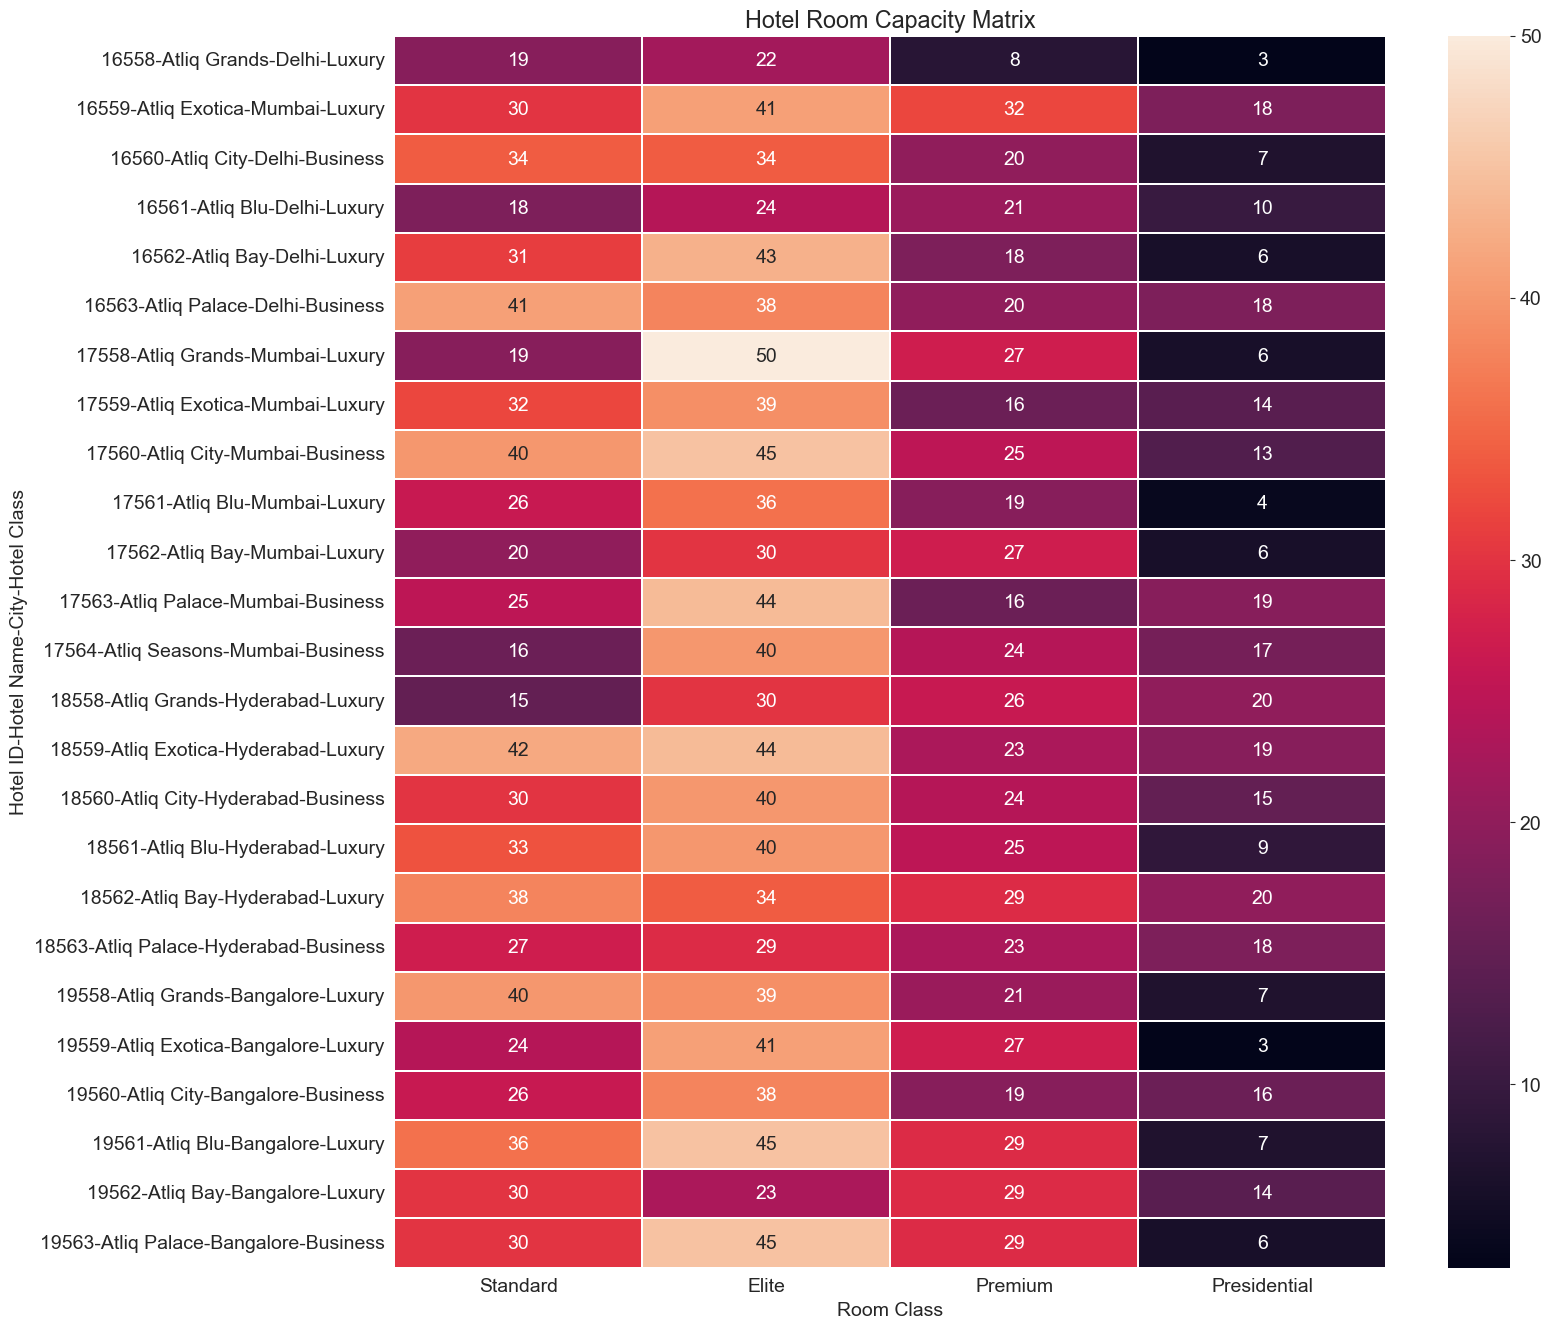

In [36]:
# Hotel Room capacity matrix

capacity_matrix = aggregated_df.groupby(['Hotel ID', 'Hotel Name', 'City', 'Hotel Class', 'Room Class'])['Total Room Capacity'].mean().unstack()


# Room Class Order

room_class_order = ['Standard', 'Elite', 'Premium', 'Presidential']


# Matrix, by room class order

capacity_matrix = capacity_matrix[room_class_order]


# Plot

plt.figure(figsize=(16, 16))
sns.heatmap(capacity_matrix, annot=True, fmt=".0f", linewidth=0.01)

plt.title('Hotel Room Capacity Matrix')
plt.show()

### Observations:

**Capacity distribution:**

- `Standard rooms` generally have the `highest capacity` across most hotels.
- `Presidential rooms` consistently have the `lowest capacity`.
- `Elite and Premium rooms` typically have capacities `between Standard and Presidential`.


**Largest capacities:**

- `Atliq Grands Mumbai Luxury` has the highest capacity of `Elite rooms (50)`.
- `Atliq Exotica Hyderabad Luxury` has the highest capacity of `Standard rooms (42)`.


**Smallest capacities:**

- Several hotels have `very low capacities (3-4 rooms)` for `Presidential suites`.


**Business vs Luxury:**

- `Business class` hotels generally seem to have `lower capacities` compared to Luxury class hotels in the `same city`.


**Two Atliq Exotica hotels in Mumbai:**

- `16559-Atliq Exotica-Mumbai-Luxury` and `17559-Atliq Exotica-Mumbai-Luxury`
- Both are `luxury hotels`. The first one `(16559)` has a `higher total capacity` and more balanced distribution across room types, while the second one `(17559)` has fewer Premium and Presidential rooms compared to its Standard and Elite offerings.

### Distribution of numerical features

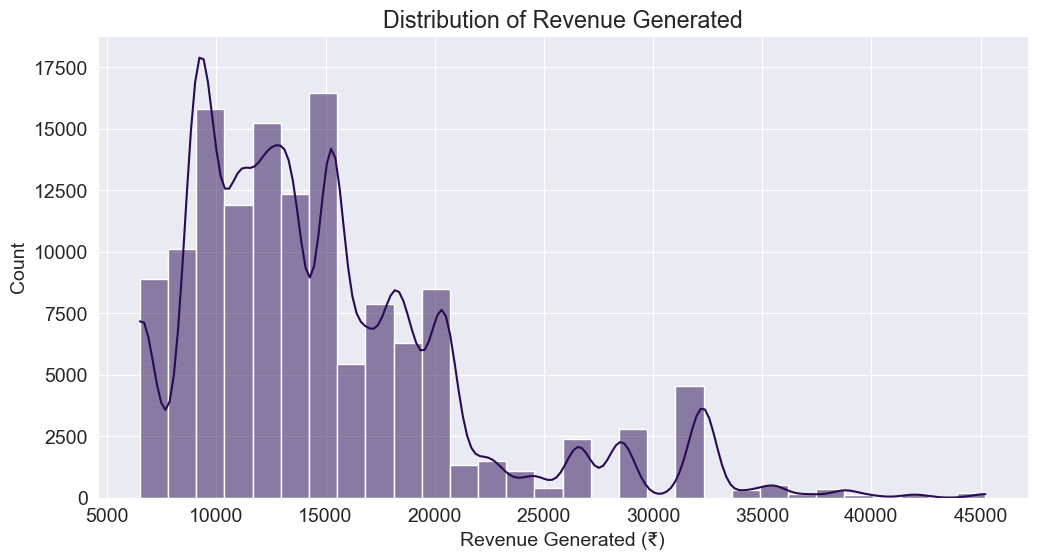

In [37]:
# Distribution of Revenue Generated

sns.histplot(data=bookings_df, x='Revenue Generated', bins=30, kde=True)

plt.title('Distribution of Revenue Generated')
plt.xlabel('Revenue Generated (₹)')
plt.show()

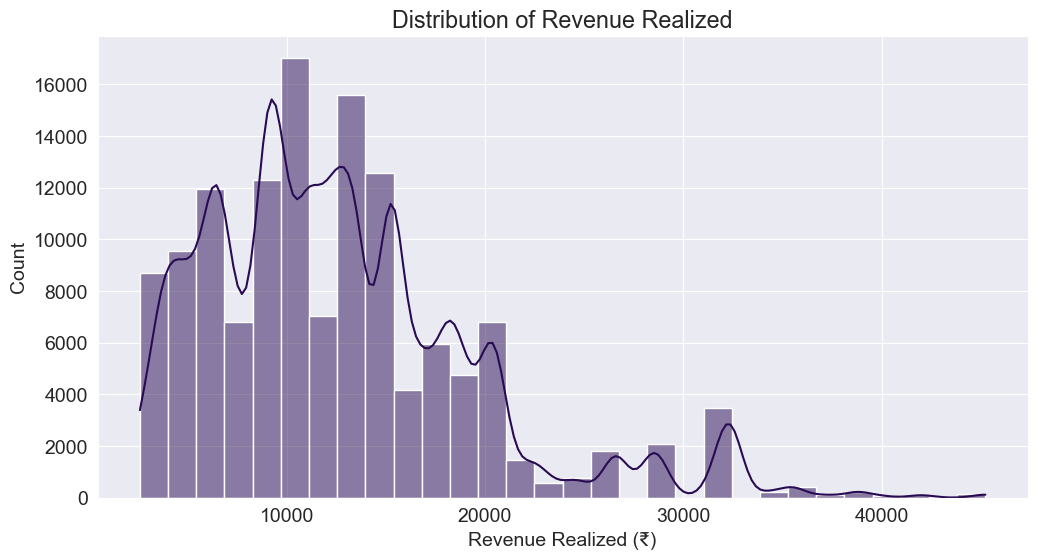

In [38]:
# Distribution of Revenue Realized

sns.histplot(data=bookings_df, x='Revenue Realized', bins=30, kde=True)

plt.title('Distribution of Revenue Realized')
plt.xlabel('Revenue Realized (₹)')
plt.show()

### Observations:

- Both `revenue generated and realized` show `similar right-skewed` distributions.
- The **majority of revenue** falls in the range of `₹10,000 to ₹20,000` per booking.
- There are **fewer instances of very high revenue (>₹30,000).**
- The peak of both distributions is around `₹8,000-₹16,000`.

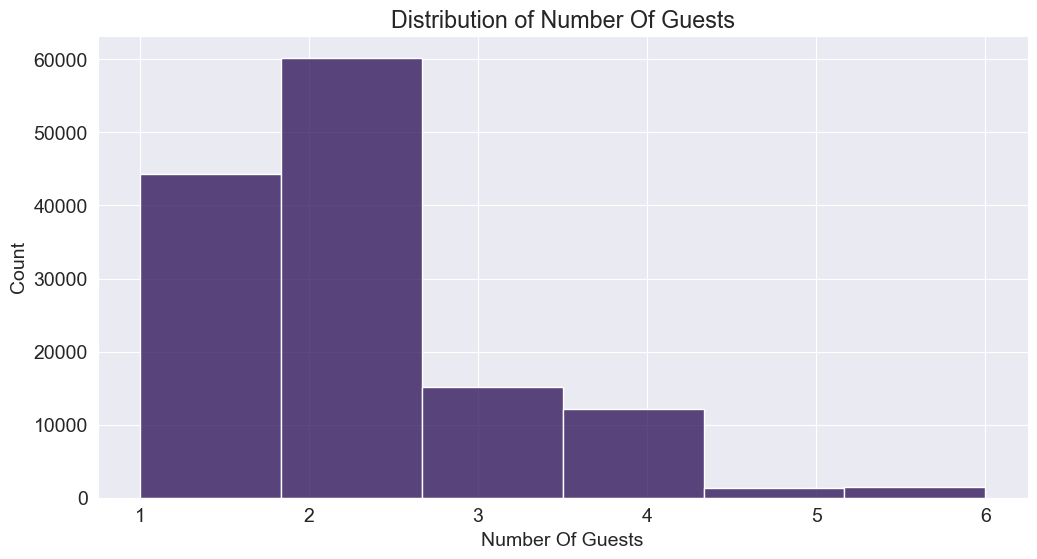

In [39]:
# Distribution of Number Of Guests

sns.histplot(data=bookings_df, x='Number Of Guests', bins=6)

plt.title('Distribution of Number Of Guests')
plt.show()

#### Observations:

- `Most bookings` are for `1-2 guests`, with 2 guests being the most common.
- There's a `sharp decline` in bookings for `3 or more guests`.
- `Very few bookings` are made for `5-6 guests`.

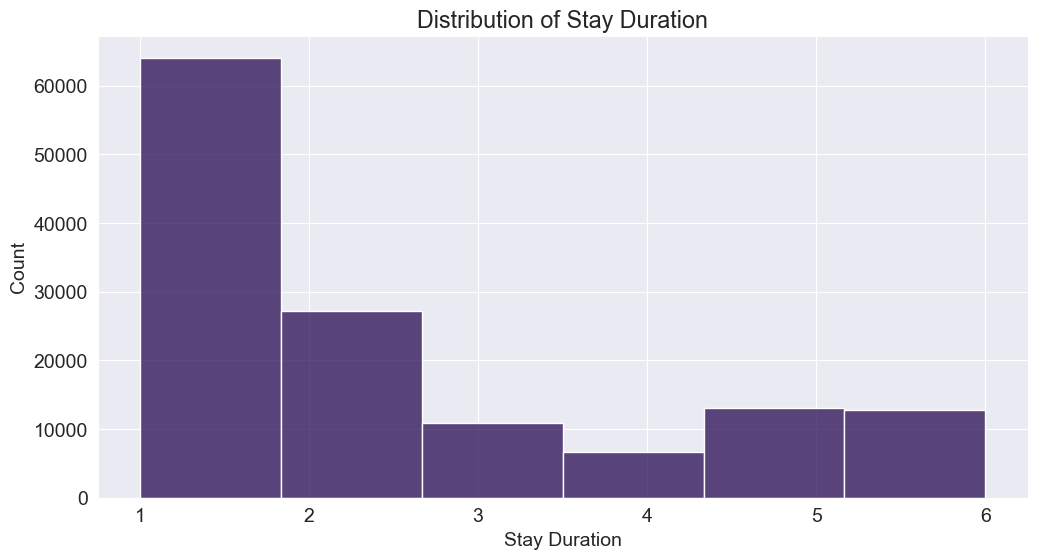

In [40]:
# Distribution of Stay Duration 

sns.histplot(data=bookings_df, x='Stay Duration', bins=6)

plt.title('Distribution of Stay Duration')
plt.show()

### Observations:

- `1-day stays` are by far the `most common`.
- There's a `gradual decrease` in frequency for `longer stays`.
- Stays of `5-6 days` are `more common` than `3-4 days`.

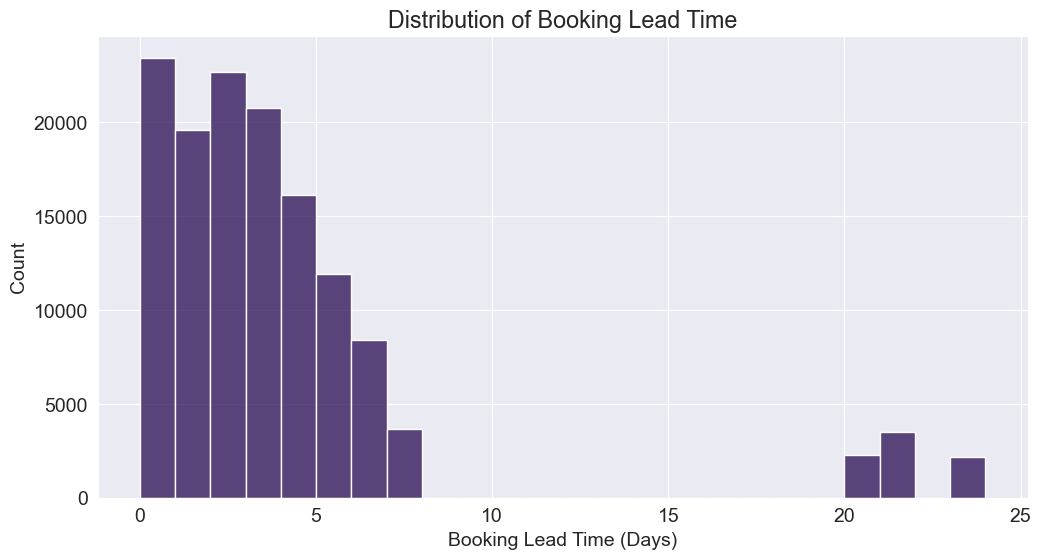

In [41]:
# Distribution of Booking Lead Time

sns.histplot(data=bookings_df, x='Booking LeadTime', bins=24)

plt.title('Distribution of Booking Lead Time')
plt.xlabel('Booking Lead Time (Days)')
plt.show()

### Observations:

- **Most bookings are made 0-7 days in advance, with a peak around 0-2 days**.
- There's a `gradual decrease` in bookings made `further in advance`.
- There's a `small uptick` in bookings made around `20-25 days in advance`.

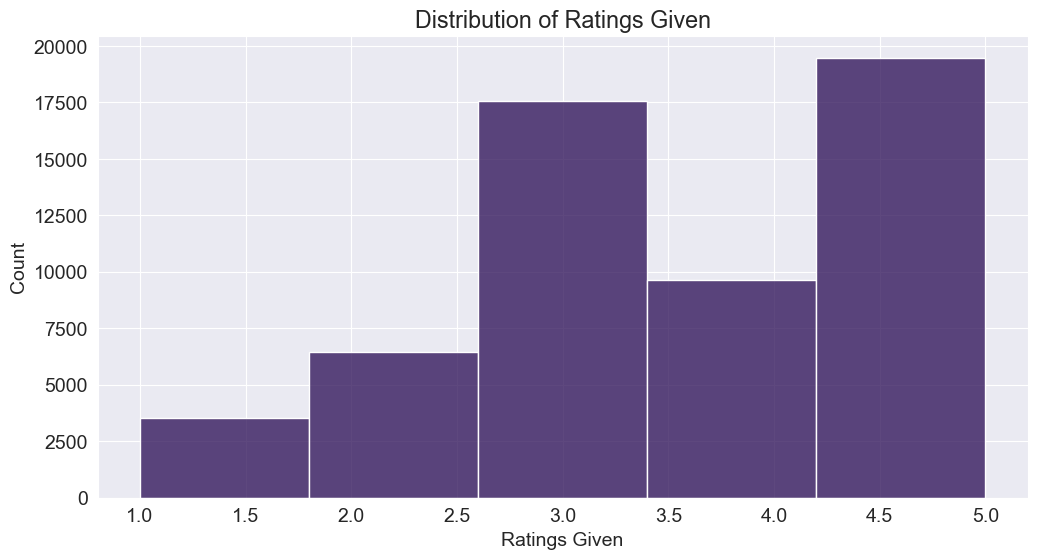

In [42]:
# Distribution of Ratings Given

sns.histplot(data=bookings_df, x='Ratings Given', bins=5)

plt.title('Distribution of Ratings Given')
plt.show()

### Observations: 

- Ratings are generally `between 3.0 and 5.0`.
- **The highest number of ratings are 5.0 (excellent)**.
- Very `few` guests give ratings `below 3.0`.

### Assumptions

For the purpose of this analysis, we will make some assumptions and verify them throughout the analysis. This approach will help us focus our investigation and potentially uncover important insights about our business. 

As we proceed, we'll state our assumptions clearly and then use the data to either confirm or challenge these assumptions. 

By verifying our assumptions against the data, we can ensure that our conclusions are data-driven and reliable. This will provide a solid foundation for any recommendations or decisions resulting from this analysis.

### Assumption 1: 

**Revenue generated is expected to be related to stay duration, number of guests, booking lead time, and potentially, ratings given. Additionally, revenue generated is assumed to be highly correlated with revenue realized. Based on this assumption, we can also evaluate whether the pricing strategy is static or dynamic.**

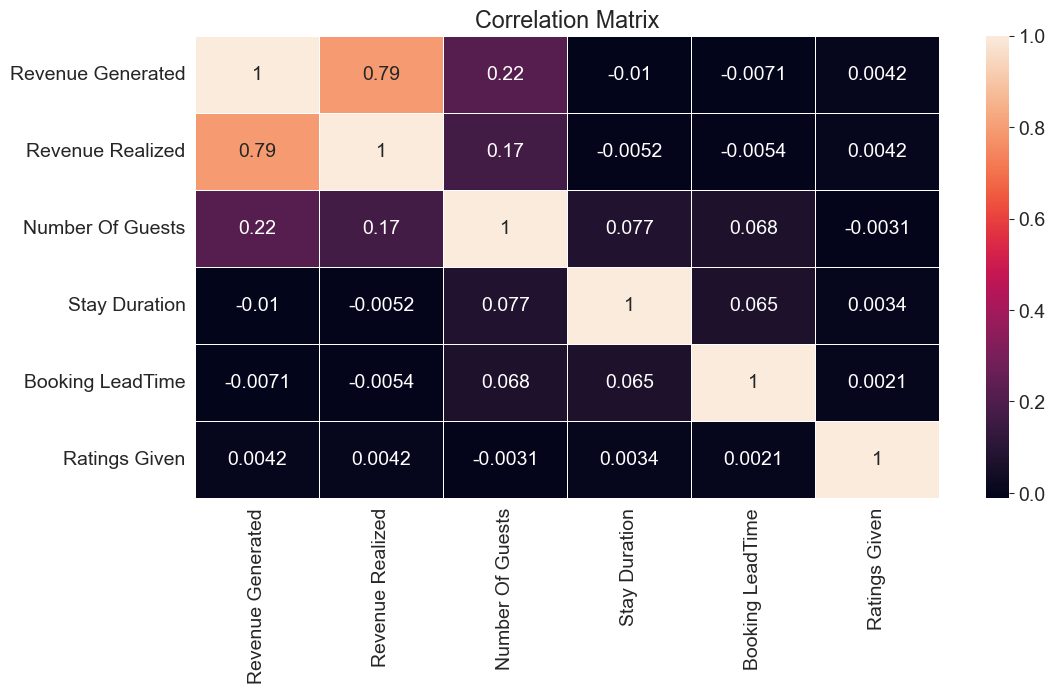

In [43]:
# Correlation matrix between numeric features

corr_matrix = bookings_df[['Revenue Generated', 'Revenue Realized', 'Number Of Guests', 'Stay Duration', 'Booking LeadTime', 'Ratings Given']].corr()

# Correlation heatmap

sns.heatmap(corr_matrix, annot=True, linewidths=0.5)

plt.title('Correlation Matrix')
plt.show()

### Observations:

##### Revenue Generated and Revenue Realized:
**These have a strong positive correlation (0.79), which is expected. This supports part of the assumption about their relationship.**

##### Number of Guests:
There's a `weak positive correlation` with `Revenue Generated (0.22)` and `Revenue Realized (0.17)`. This suggests that while more guests do tend to generate more revenue, **the relationship is not as strong as initially assumed in Assumption 1.**

##### Stay Duration:
Surprisingly, there's `almost no correlation` with `Revenue Generated (-0.01)` or `Revenue Realized (-0.0052)`. **This contradicts the Assumption 1 that longer stays would significantly increase revenue.**

##### Booking Lead Time:
There's a `very slight negative correlation` with `Revenue Generated (-0.0071)` and `Revenue Realized (-0.0054)`, which is essentially negligible. **This doesn't support Assumption 1 that earlier bookings correlate with higher revenue.**

##### Ratings Given:
There's `practically no correlation` with `Revenue Generated (0.0042)` or `Revenue Realized (0.0042)`. **This suggests that ratings have minimal impact on revenue, contrary to the initial Assumption 1.**

**Given these results, we can conclude that the pricing strategy doesn't seem to be dynamic and is static. A dynamic pricing strategy would typically show stronger correlations between factors like stay duration, booking lead time, or number of guests with revenue.**

##### Some implications and recommendations based on this data:

- The hotel might be using a `fixed pricing model`, not adjusting prices based on demand factors.
- There's an `opportunity to implement dynamic pricing` to potentially increase revenue, especially considering factors like stay duration and booking lead time.
- The `weak correlation` with number of guests suggests that the `hotel might not be effectively capitalizing on group bookings or larger parties`.
- The `lack of correlation` between ratings and revenue might indicate that the `hotel's reputation isn't significantly impacting its pricing power`.

## Key Performance Indicators (KPIs)

#### We'll establish a set of KPIs that offer valuable insights into the overall revenue and hotel performance. Tracking these KPIs over time will enable us to make informed strategic decisions, optimize revenue generation, and enhance guest satisfaction, ultimately driving sustainable business growth.
<br>

**Total Number of Bookings**: The count of all individual bookings in the dataset.

**Total Revenue Generated**: The sum of all revenue from bookings before cancellations.

**Total Revenue Realized**: The sum of revenue adjusted for cancellations and refunds.

**Total Room Capacity**: The total number of room nights available over the period.

**Total Booked Rooms**: The sum of all room nights booked over the period.

**Total Number of Guests**: The total count of all guests who stayed.

**Total Number of Cancellations**: The count of bookings that were canceled.

**Total Number of No Shows**: The count of bookings where the guest did not show up.

**Average Length of Stay**: The average duration of stays, calculated in days.

**Average Booking Lead Time**: The average number of days between booking and check-in.

**Average Rating**: The average rating given by guests.

**Net Revenue Ratio**: The ratio of revenue realized to revenue generated, indicating revenue retention.

**No Show Rate**: The percentage of bookings where the guest did not show up.

**Cancellation Rate**: The percentage of bookings that were canceled.

**Gross Occupancy Rate**: The percentage of available room nights that were booked.

**Average Daily Rate (ADR)**: The average revenue earned per booked room daily.

**Revenue per Available Room (RevPAR)**: The average revenue earned per available room daily.

**Revenue Realized per Room**: The average revenue realized per booked room daily.

In [44]:
# Key Performance Indicators (KPIs)


# Total number of bookings
total_bookings = bookings_df['Booking ID'].count()

# Total Revenue Generated
total_revenue_generated = bookings_df['Revenue Generated'].sum()

# Total Revenue Realized
total_revenue_realized = bookings_df['Revenue Realized'].sum()

# Total Room capacity for the period
total_room_capacity = aggregated_df['Total Room Capacity'].sum()

# Total Booked rooms for the period
total_booked_rooms = aggregated_df['Booked Rooms'].sum()

# Total Number of Guests
total_guests = bookings_df['Number Of Guests'].sum()

# Total Number of Cancellations
total_cancellations = bookings_df[bookings_df['Booking Status'] == 'Cancelled'].shape[0]

# Total Number of No Show
total_no_shows = bookings_df[bookings_df['Booking Status'] == 'No Show'].shape[0]

# Average length of stay
average_stay_duration = bookings_df['Stay Duration'].mean()

# Average booking lead time
average_booking_lead_time = bookings_df['Booking LeadTime'].mean()

# Average ratings
average_rating = bookings_df['Ratings Given'].mean()



# Net Revenue ratio
net_revenue_ratio = total_revenue_realized / total_revenue_generated

# No show rate
no_show_rate = total_no_shows / total_bookings

# Cancellation rate
cancellation_rate = total_cancellations / total_bookings

# Gross occupancy rate
gross_occupancy_rate =  total_booked_rooms / total_room_capacity

# Average daily rate
adr = total_revenue_generated / total_booked_rooms

# Revenue per available room
revpar = total_revenue_generated / total_room_capacity

# Revenue realized per room
revenue_realized_per_room = total_revenue_realized / total_booked_rooms

In [45]:
# KPIs dictionary

kpis = {
    'Total Bookings': total_bookings,
    'Total Revenue Generated (₹)': total_revenue_generated,
    'Total Revenue Realized (₹)': total_revenue_realized,
    'Total Room Capacity': total_room_capacity,
    'Total Booked Rooms': total_booked_rooms,
    'Total Number of Guests': total_guests,
    'Total Cancellations': total_cancellations,
    'Total No-Shows': total_no_shows,
    'Average Length of Stay': average_stay_duration,
    'Average Booking Lead Time': average_booking_lead_time,
    'Average Rating': average_rating,
    'Net Revenue Ratio': net_revenue_ratio,
    'No-Show Rate': no_show_rate,
    'Cancellation Rate': cancellation_rate,
    'Gross Occupancy Rate': gross_occupancy_rate,
    'Average Daily Rate (ADR) (₹)': adr,
    'Revenue Per Available Room (RevPAR) (₹)': revpar,
    'Revenue Realized Per Room (₹)': revenue_realized_per_room
}


# Round all values to 2 decimal places

kpis = {key: round(value, 2) for key, value in kpis.items()}

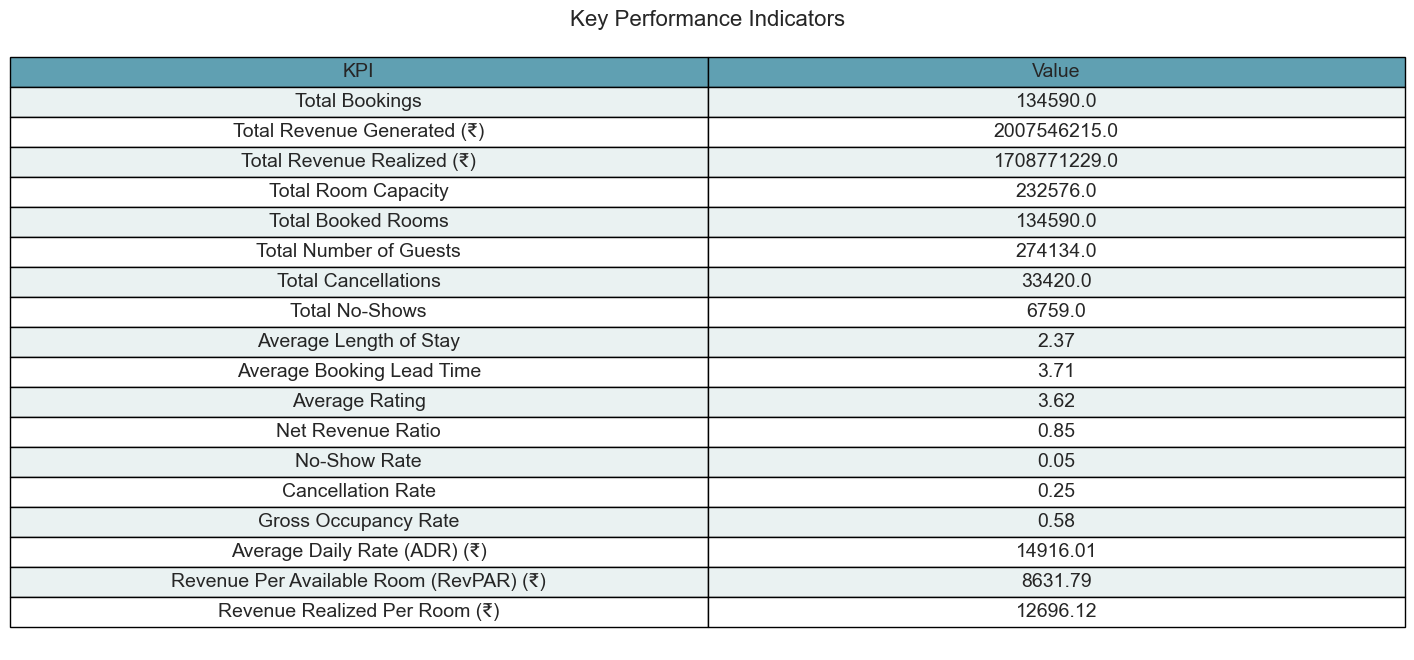

In [46]:
# Convert KPIs to a DataFrame for easier styling

kpi_df = pd.DataFrame(kpis.items(), columns=['KPI', 'Value'])


# Plot the fancy table

fig, ax = plt.subplots(figsize=(10, 8))
ax.axis('off')


# Create a table with colored cells

table = ax.table(cellText=kpi_df.values,
                 colLabels=kpi_df.columns,
                 cellLoc='center',
                 loc='center',
                 colColours=['#60A0B2', '#60A0B2'])


# Style the table

table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.8, 1.8)


# Color each cell based on even/odd rows

for i in range(len(kpi_df)):
    color = '#EAF2F2' if i % 2 == 0 else '#FFFFFF'
    table[(i + 1, 0)].set_facecolor(color)
    table[(i + 1, 1)].set_facecolor(color)


plt.title('Key Performance Indicators', fontsize=16)
plt.show()

### Observations:

1. **Total Bookings (134,590) vs Total Booked Rooms (134,590):**
   This indicates that on average, `each booking is for exactly one room`. There are no multi-room bookings, which is unusual for a hotel.

2. **Total Room Capacity (232,576) vs Total Booked Rooms (134,590):**
   The hotel is operating at about `57.8% of its total capacity`, which aligns with the `Gross Occupancy Rate of 0.58 or 58%`.

3. **Total Number of Guests (274,134) vs Total Bookings (134,590):**
   On average, there are about `2.04 guests per booking`, which seems reasonable.

4. **Average Length of Stay (2.37 days):**
   This is `relatively short`. Encouraging longer stays could potentially increase revenue.

5. **Total Cancellations (33,420) and Total No-Shows (6,759):**
   The `Cancellation Rate (25%)` and `No-Show Rate (5%)` are quite high.

6. **Average Booking Lead Time (3.71 days):**
    This is quite `short`, suggesting many `last-minute bookings`. It limits the hotel's ability to plan and optimize pricing.

7. **Average Rating (3.62 out of 5):**
    This is `above average` but leaves room for improvement in customer satisfaction.

8. **Gross Occupancy Rate (0.58 or 58%):**
    This aligns with the earlier calculation and indicates the potential for increased bookings.

9. **Average Daily Rate (ADR) (₹14,916.01):**
    This seems to be a `mid to high-range rate`, depending on the hotel's location and category.

10. **Revenue Per Available Room (RevPAR) (₹8,631.79):**
    This is `lower than the ADR` due to the `occupancy rate not being 100%`.

11. **Revenue Realized Per Room (₹12,696.12):**
    This is `higher than RevPAR but lower than ADR`, reflecting the `impact of cancellations and no-shows`.

## Trend Analysis

In [47]:
# Function to format the ticks in millions
def millions_formatter(x, pos):
    return '%1.2fM' % (x * 1e-6)

In [48]:
# Function to add x-ticks in millions format
def xformat():
    ax=plt.gca()
    ax.xaxis.set_major_formatter(FuncFormatter(millions_formatter))

In [49]:
# Function to add y-ticks in millions format
def yformat():
    ax=plt.gca()
    ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

### Assumption 2: 

**It is assumed that the trends in revenue generated and revenue realized will be similar across different hotel classes, cities, and individual hotels within the Altiq Grands portfolio. This means that patterns observed in revenue trends for one dimension (such as hotel class or city) are expected to be comparable to those observed in other dimensions, reflecting consistent factors influencing revenue performance across the entire portfolio.**

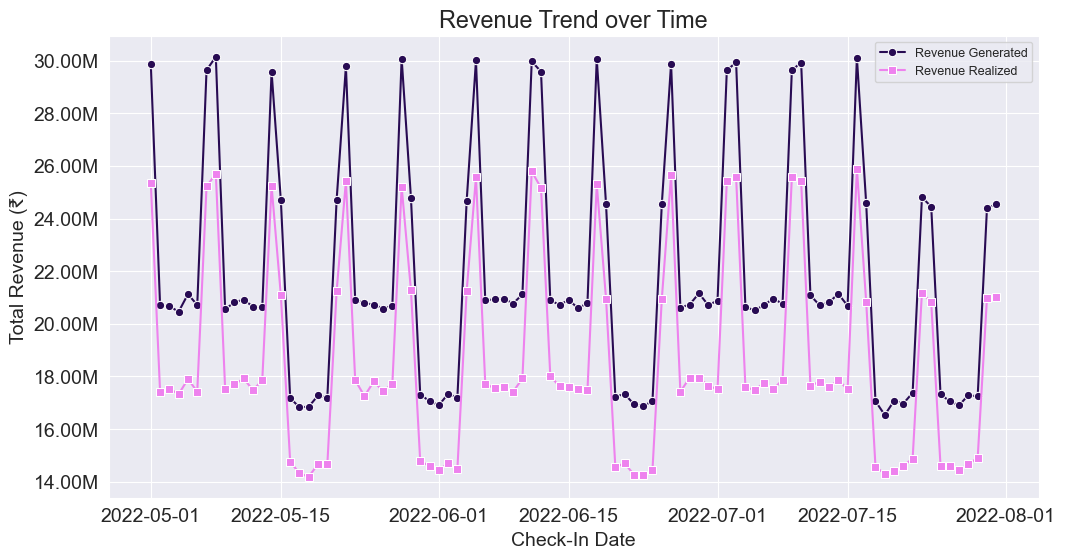

In [50]:
# Daily revenue

revenue_day = bookings_df.groupby('Check-In Date')[['Revenue Generated', 'Revenue Realized']].sum().reset_index()


# Revenue Generated

sns.lineplot(data=revenue_day, x='Check-In Date', y='Revenue Generated', marker='o', errorbar=None, label='Revenue Generated')


# Revenue Realized

sns.lineplot(data=revenue_day, x='Check-In Date', y='Revenue Realized', marker='s', errorbar=None, label='Revenue Realized', color='violet')

plt.ylabel('Total Revenue (₹)')
plt.legend(fontsize=9)
yformat()
plt.title('Revenue Trend over Time')
plt.show()

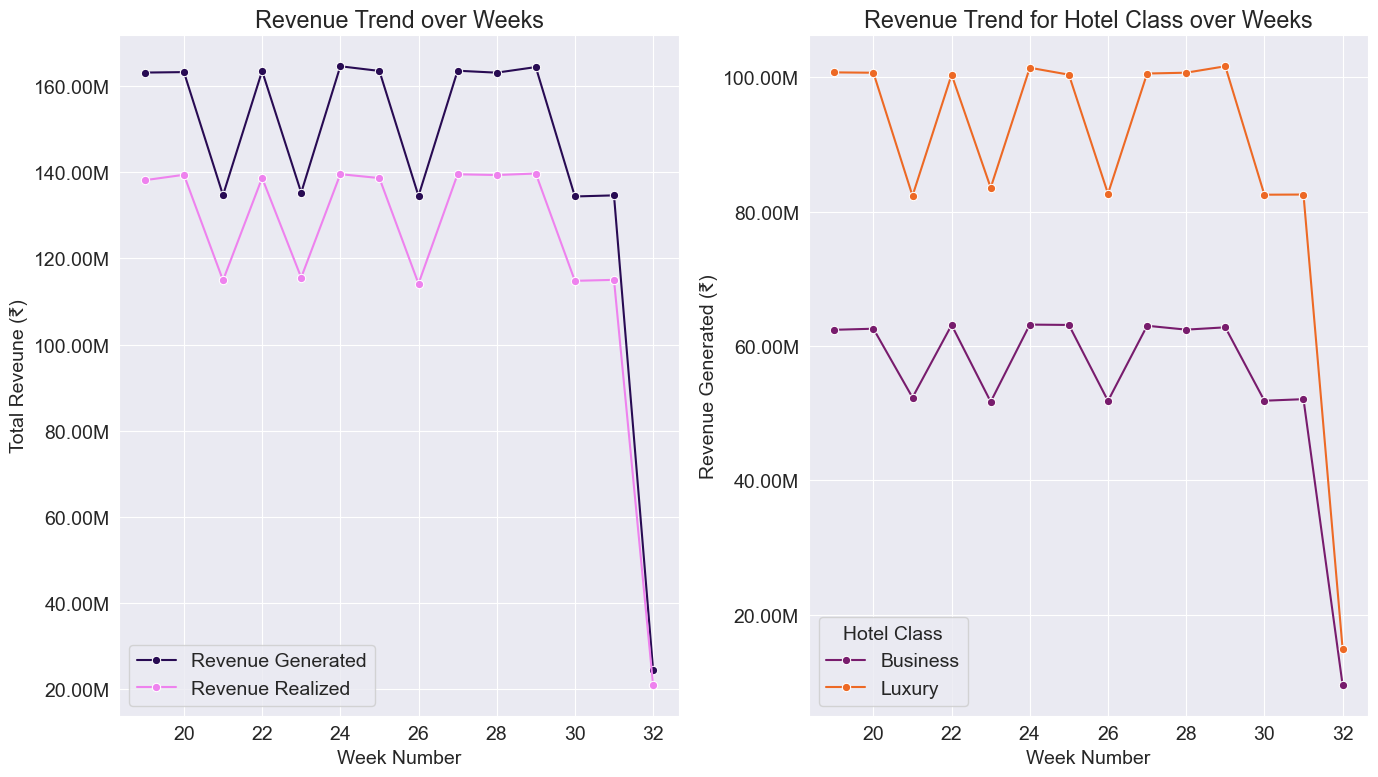

In [51]:
# Weekly revenue

revenue_week = bookings_df.groupby(['Week Number', 'Hotel Class'])[['Revenue Generated', 'Revenue Realized']].sum().reset_index()


# Revenue Generated

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)

sns.lineplot(data=revenue_week, x='Week Number', y='Revenue Generated', marker='o', errorbar=None, estimator='sum', label='Revenue Generated')


# Revenue Realized

sns.lineplot(data=revenue_week, x='Week Number', y='Revenue Realized', marker='o', errorbar=None, estimator='sum', label='Revenue Realized', color='violet')

plt.title('Revenue Trend over Weeks')
plt.ylabel('Total Reveune (₹)')
yformat()


# Revenue Generated by Hotel Class
plt.subplot(1, 2, 2)

sns.lineplot(data=revenue_week, x='Week Number', y='Revenue Generated', marker='o', errorbar=None, estimator='sum', hue='Hotel Class', 
             palette = sns.color_palette('inferno', n_colors=2))

plt.title('Revenue Trend for Hotel Class over Weeks')
plt.ylabel('Revenue Generated (₹)')
yformat()

plt.tight_layout()
plt.show()

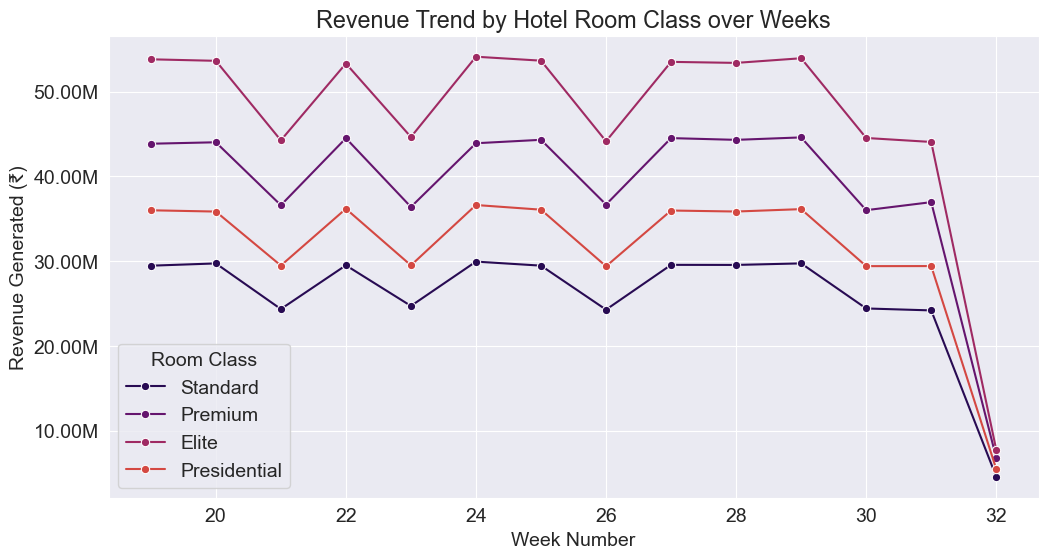

In [52]:
# Revenue Generated by Hotel Room Class

sns.lineplot(data=bookings_df, x='Week Number', y='Revenue Generated', marker='o', errorbar=None, estimator='sum', hue='Room Class')

plt.title('Revenue Trend by Hotel Room Class over Weeks')
plt.ylabel('Revenue Generated (₹)')
yformat()
plt.show()

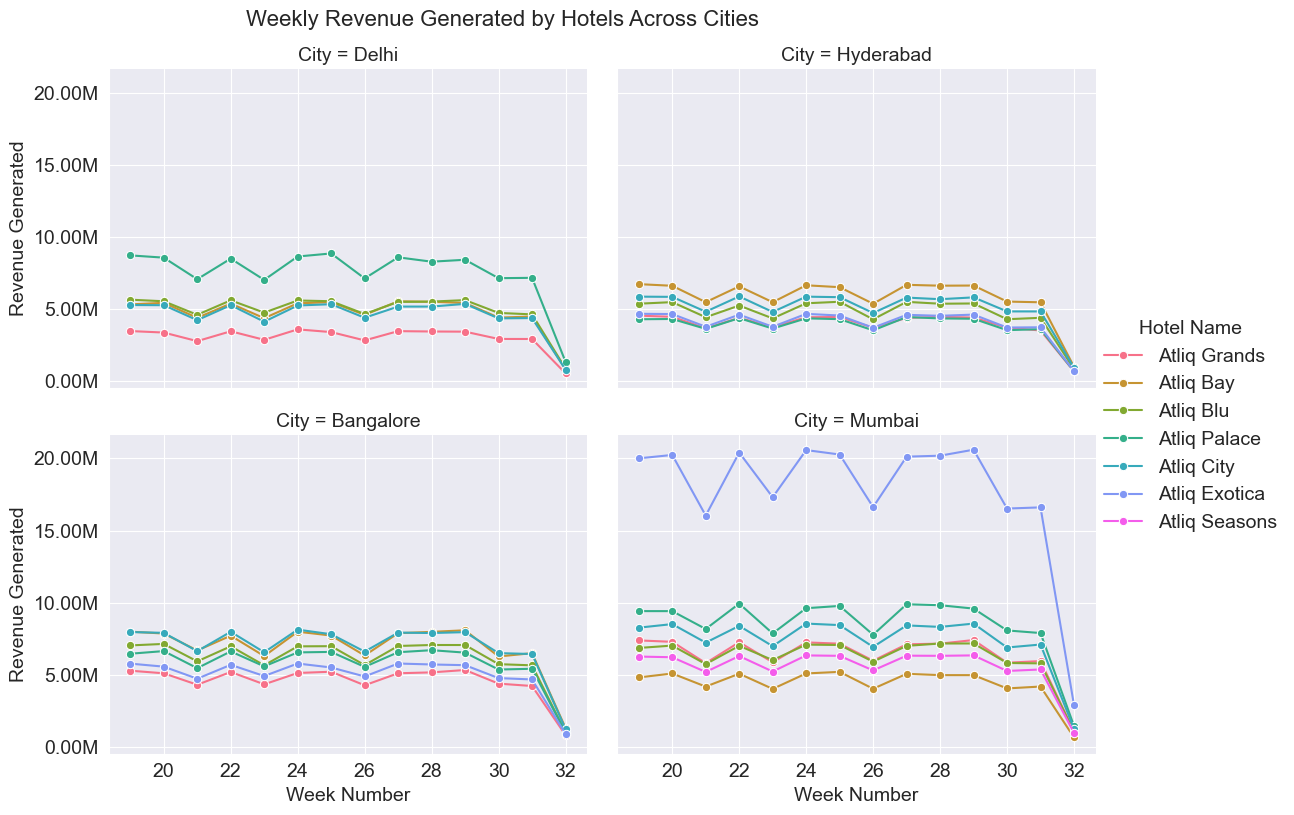

In [53]:
# Create the FacetGrid

g = sns.FacetGrid(bookings_df, col='City', col_wrap=2, height=4, sharex=True, sharey=True, hue='Hotel Name')


# Plot 

g.map(sns.lineplot, 'Week Number', 'Revenue Generated', marker='o', estimator='sum', errorbar=None)


for ax in g.axes.flat:
    yformat()  
    

# Move the legend outside the grid
g.add_legend(bbox_to_anchor=(1.10, 0.5), loc='center left', borderaxespad=0.)

g.fig.suptitle('Weekly Revenue Generated by Hotels Across Cities', fontsize=16, y=1.02)

plt.subplots_adjust(right=1.10) 
plt.show()

### Observations:

##### Revenue trends across hotel classes:

The trends for `luxury and business class` hotels are indeed `similar`, showing consistent patterns of peaks and troughs over the weeks.
Both classes experience a significant `drop` in revenue in the `final weeks shown (weeks 30-32)`.


##### Revenue trends across cities:

While there are `some similarities` in the overall trend patterns across cities (e.g., the sharp decline in the final weeks), there are also `notable differences`:

- `Mumbai` shows higher volatility and generally `higher revenue` compared to other cities.
- Delhi, Hyderabad, and Bangalore show more stable patterns with lower revenue levels.


##### Revenue trends for individual hotels:

Within each city, individual `hotels show similar trend patterns`, but with varying revenue levels. `Atilq Exotica` in `Mumbai` stands out with significantly higher revenue (likely due to two Alitq Exotica hotels in Mumbai) and more pronounced fluctuations compared to other hotels.


##### Overall revenue trend:

The `general trend of revenue generated and revenue realized is similar` across all dimensions, with `weekly fluctuations` likely corresponding to `weekends` and a sharp decline in the final weeks.

**The Assumption 2 holds true to some extent, particularly in terms of the overall trend patterns and the final sharp decline observed across all dimensions. However, there are significant variations in revenue levels and volatility between different cities and individual hotels, which suggests that local factors and hotel-specific characteristics also play important roles in revenue performance.**

In conclusion, while there are broad similarities in revenue trends across the portfolio, the assumption of **completely uniform trends across all dimensions is not fully supported by the data.**

### Assumption 3: 

**There may be a relationship between the trends in revenue generated and the ratings given on a weekly basis, which could indicate how customer satisfaction correlates with financial performance over time.**

In [54]:
# Ratings Given, Weekly

rating_week = bookings_df.groupby('Week Number')['Ratings Given'].mean().reset_index()


# Merge, Revenue Generated and Ratings Given Weekly

rev_rating_week = pd.merge(revenue_week ,rating_week, on='Week Number')


# Add new feature, Previous Week Ratings and use backward fill method to fill NaN

rev_rating_week['Previous Week Ratings'] = rev_rating_week['Ratings Given'].shift(1).fillna(method='bfill')

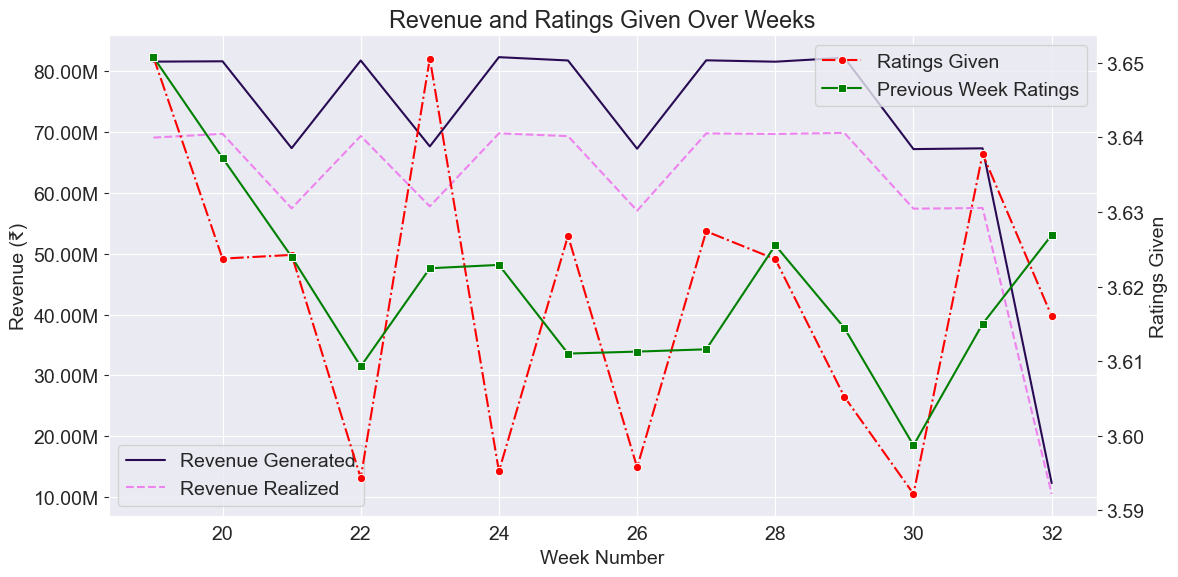

In [55]:
# Revenue Generated, Ratings Given and Previous Ratings Given, Weekly


# Subplots

fig, ax1 = plt.subplots()


# Revenue Generated

sns.lineplot(data=rev_rating_week, x='Week Number', y='Revenue Generated', ax=ax1, label='Revenue Generated', errorbar=None)
sns.lineplot(data=rev_rating_week, x='Week Number', y='Revenue Realized', ax=ax1, label='Revenue Realized', linestyle='--', color='violet', errorbar=None)
ax1.set_ylabel('Revenue (₹)')
ax1.legend(loc='lower left')
yformat()


# Create a second y-axis

ax2 = ax1.twinx()


# Ratings Given

sns.lineplot(data=rev_rating_week, x='Week Number', y='Ratings Given', ax=ax2, marker='o', color='r', linestyle='-.', label='Ratings Given', errorbar=None)
sns.lineplot(data=rev_rating_week, x='Week Number', y='Previous Week Ratings', ax=ax2, marker='s', color='g', label='Previous Week Ratings', errorbar=None)
ax2.set_ylabel('Ratings Given')
ax2.legend(loc='upper right')
ax2.grid(False)

plt.title('Revenue and Ratings Given Over Weeks')
fig.tight_layout()
plt.show()

### Observations:

##### Ratings stability: 
- The `Ratings Given` line (red dashed) shows very `little variation week-to-week`. The ratings mostly hover around the `3.59-3.64` range, with only minor fluctuations.
- The `Previous Week Ratings` line (green) also shows limited variation, further `reinforcing the stability` of ratings over time.

##### Lack of correlation: 
- There's `no clear visual correlation` between the minor changes in ratings and the major swings in revenue.


**The Assumption 3 is not supported by the data. The ratings remain relatively stable regardless of significant changes in revenue. This suggests that, at least in the short term and based on this dataset, customer satisfaction (as measured by ratings) does not have a strong or direct relationship with the hotel's financial performance (as measured by revenue).**

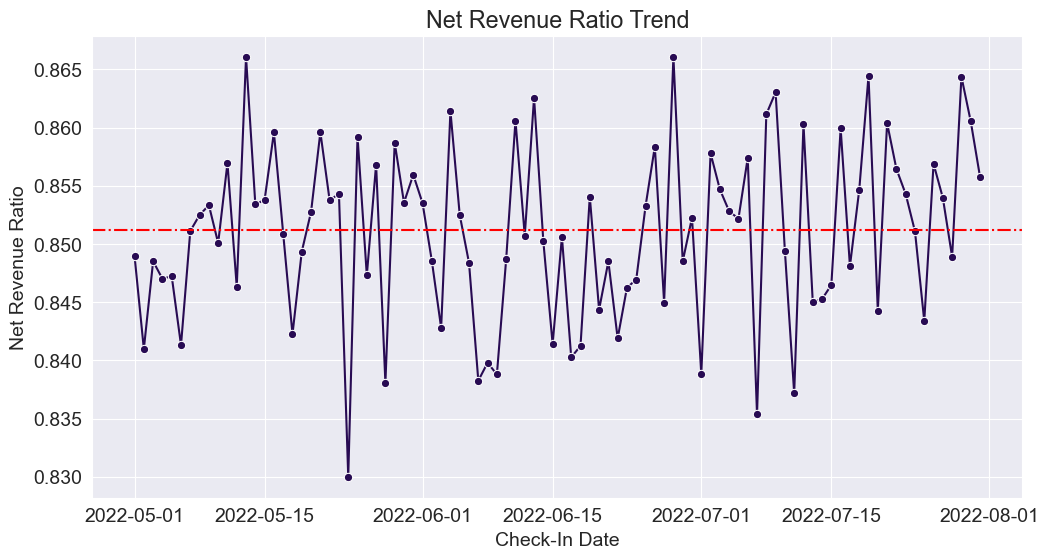

In [56]:
# Net Revenue Ratio

revenue_day['Net Revenue Ratio'] = revenue_day['Revenue Realized'] / revenue_day['Revenue Generated']


# Plot

sns.lineplot(data=revenue_day, x='Check-In Date', y='Net Revenue Ratio', marker='o')

# Net Revenue Ratio line, for period

plt.axhline(y=net_revenue_ratio, color='red', linestyle='-.', label=f'Net Revenue Ratio for Period: {net_revenue_ratio:.3f}')


plt.title('Net Revenue Ratio Trend')
plt.show()

### Observations:

* The net revenue ratio fluctuates `between approximately 0.835 and 0.865` over the period.
* `No clear long-term trend` is visible; the ratio seems to oscillate around a mean value.

In [57]:
# Aggregated booked rooms and total room capacity by check-in day

room_day = aggregated_df.groupby('Check-In Date')[['Booked Rooms', 'Total Room Capacity']].sum().reset_index()



# Aggregated data by check-in day

aggregated_day = pd.merge(revenue_day, room_day, on='Check-In Date')



# Average daily rate

aggregated_day['Average Daily Rate'] = aggregated_day['Revenue Generated'] / aggregated_day['Booked Rooms']


# Revenue per available room

aggregated_day['Revenue per Available Room'] = aggregated_day['Revenue Generated'] / aggregated_day['Total Room Capacity']


# Revenue realized per room

aggregated_day['Revenue Realized per Room'] = aggregated_day['Revenue Realized'] / aggregated_day['Booked Rooms']

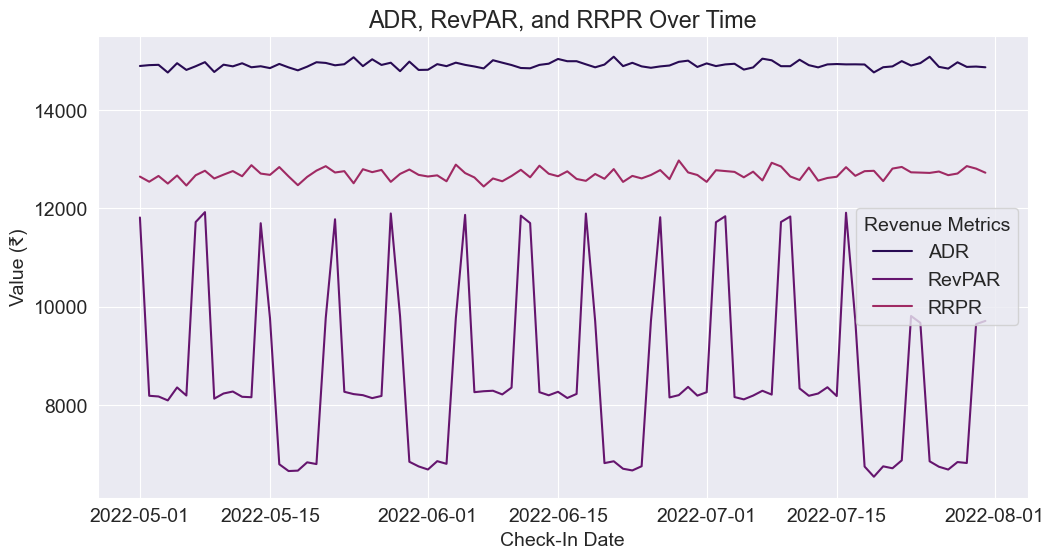

In [58]:
# Plot of metrics (ADR, RevPAR, RRPR), over period


# Average daily rate

sns.lineplot(data=aggregated_day, x='Check-In Date', y='Average Daily Rate', label='ADR')


# Revenue per available room

sns.lineplot(data=aggregated_day, x='Check-In Date', y='Revenue per Available Room', label='RevPAR')


# Revenue realized per room

sns.lineplot(data=aggregated_day, x='Check-In Date', y='Revenue Realized per Room', label='RRPR')


plt.title('ADR, RevPAR, and RRPR Over Time')
plt.xlabel('Check-In Date')
plt.ylabel('Value (₹)')
plt.legend(title='Revenue Metrics', loc='center right')
plt.show()

### Observations: 

* `ADR (Average Daily Rate)` remains `relatively stable` over the period, showing slight fluctuations but maintaining a consistent range.
* `RevPAR (Revenue Per Available Room)` shows a clear `cyclical pattern`. It has regular peaks and troughs, likely corresponding to `weekends periods`. The cycle repeats approximately every week. It is very `similar to daily revenue` trends.
* RRPR shows `moderate fluctuations`, more than ADR but less than RevPAR.

### Assumption 4: 

**It is assumed that occupancy rates will show significant variations on a weekly and daily basis, similar to the variations observed in revenue realized. These fluctuations are expected to align with typical booking patterns, such as higher occupancy and revenue during weekends.**

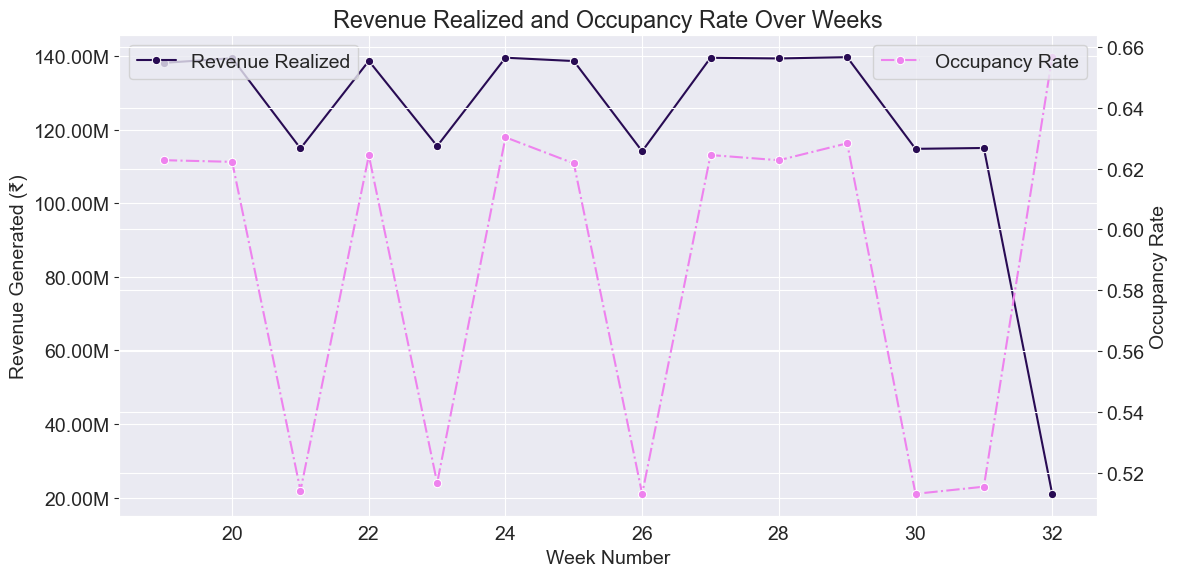

In [59]:
# Plots, Occupancy Rate and Revenue Generated weekly


# Subplots

fig, ax1 = plt.subplots()


# Revenue Generated, line plot

sns.lineplot(data=bookings_df, x='Week Number', y='Revenue Realized', ax=ax1, marker='o', label='Revenue Realized', errorbar=None, estimator='sum')
ax1.set_ylabel('Revenue Generated (₹)')
ax1.legend(loc='upper left')
yformat()


# Create a second y-axis

ax2 = ax1.twinx()


# Occupancy Rate, line plot

sns.lineplot(data=aggregated_df, x='Week Number', y='Occupancy Rate', ax=ax2, color='violet', linestyle='-.', marker='o', label='Occupancy Rate', errorbar=None)
ax2.set_ylabel('Occupancy Rate')
ax2.legend(loc='upper right')


plt.title('Revenue Realized and Occupancy Rate Over Weeks')
fig.tight_layout()
plt.show()

### Observations:

##### Occupancy rate patterns:
   - Occupancy rates demonstrate `considerable variability`, ranging from about `0.51 to 0.65`.
   - There are noticeable `peaks` in occupancy rates, particularly around `weeks 22, 24, and 32`.
   - Significant `drops` in occupancy are observed around `weeks 21, 26, and 30`.


For most weeks, there is indeed a **correlation between occupancy rate and revenue realized**. When occupancy rates rise, revenue tends to increase as well, and vice versa. This pattern is visible throughout much of the graph.
**Week 32 stands out as a significant anomaly**. It shows the highest occupancy rate of the entire period (around 0.65 or 65%), yet paradoxically, it has one of the lowest revenue points on the graph.

**While the Assumption 4 holds true for most of the observed period, week 32 serves as an important reminder that the relationship between occupancy and revenue is not always straightforward.**

## Hotel Performace

### Assumption 5: 

**Booking numbers are expected to vary significantly across hotels, room classes, cities, and day types. Hotels with more bookings should have higher occupancy rates. Luxury hotels are likely to have fewer but higher-value bookings compared to business hotels. Weekend bookings are anticipated to be higher than weekday bookings, and certain room classes may show stronger trends based on the hotel and city. These variations will reflect customer preferences, room availability, and local demand.**

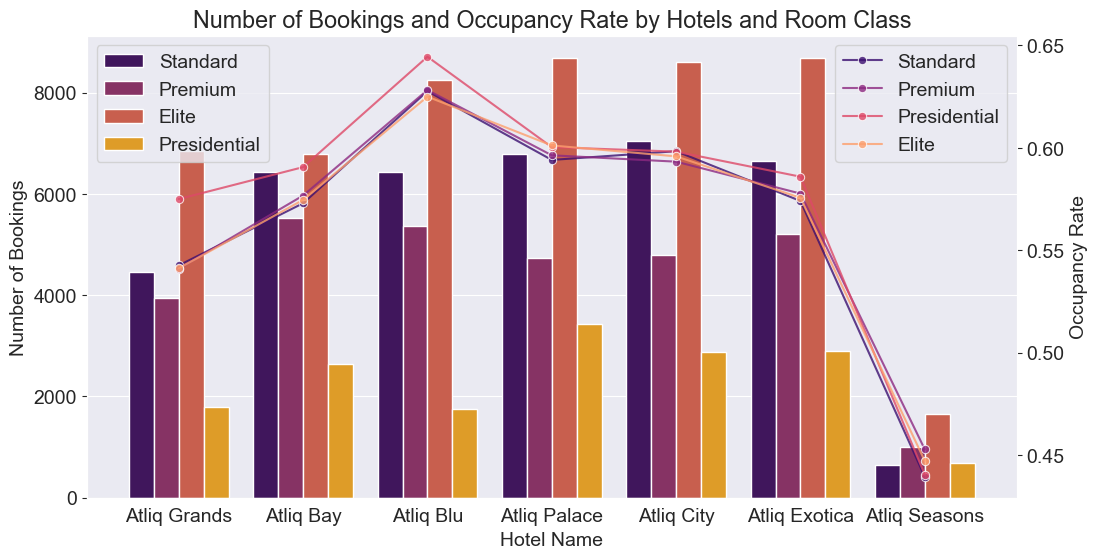

In [60]:
# Plot, Number of bookings and Occupancy rate by hotels and room class

# Subplots

fig, ax1 = plt.subplots()


# Number of bookings by hotel, Bar plot

sns.countplot(data=bookings_df, x='Hotel Name', ax=ax1, hue='Room Class', palette=sns.color_palette('inferno', n_colors=4))
ax1.set_ylabel('Number of Bookings')
ax1.legend(loc='upper left')


# Create a secondary y-axis

ax2 = ax1.twinx()


# Occupancy Rate by hotel, Line plot

sns.lineplot(data=aggregated_df, x='Hotel Name', y='Occupancy Rate', ax=ax2, hue='Room Class', marker='o', alpha=0.8, 
             errorbar=None, palette=sns.color_palette('magma', n_colors=4))
ax2.set_ylabel('Occupancy Rate')
ax2.grid(False)
ax2.legend(loc='upper right')

plt.title('Number of Bookings and Occupancy Rate by Hotels and Room Class')
plt.show()

In [61]:
# Number of Bookings per hotel

bookings_df['Hotel Name'].value_counts()

Hotel Name
Atliq Palace     23625
Atliq Exotica    23441
Atliq City       23323
Atliq Blu        21795
Atliq Bay        21389
Atliq Grands     17035
Atliq Seasons     3982
Name: count, dtype: int64

In [62]:
# Occupancy Rate per Hotel

occupancy_hotels = aggregated_df.groupby('Hotel Name')['Occupancy Rate'].mean().reset_index()
occupancy_hotels.sort_values('Occupancy Rate', ascending=False, inplace=True)
occupancy_hotels

Hotel Name  Occupancy Rate
1      Atliq Blu            0.63
5   Atliq Palace            0.60
2     Atliq City            0.60
0      Atliq Bay            0.58
3  Atliq Exotica            0.58
4   Atliq Grands            0.55
6  Atliq Seasons            0.45

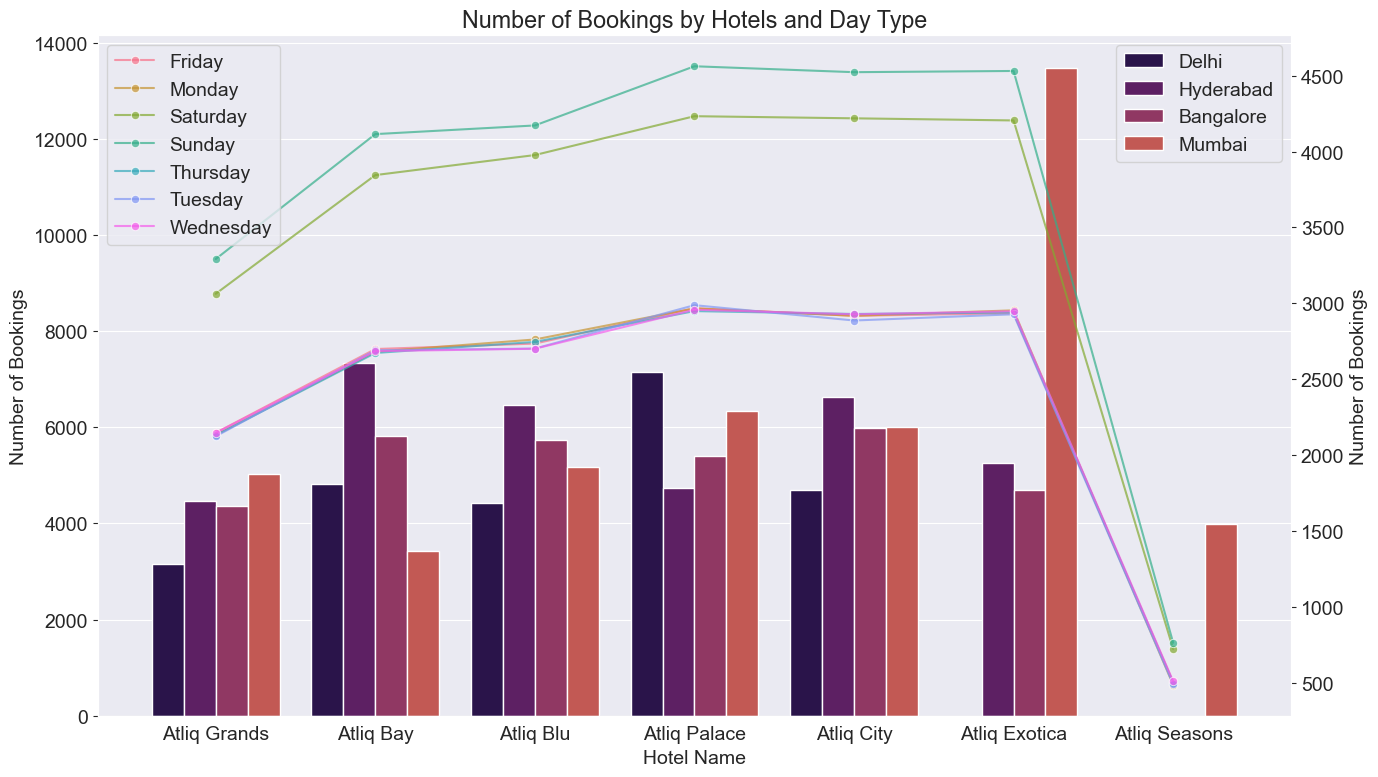

In [63]:
# Plot, Number of bookings by City and Day Type

# Subplots

fig, ax1 = plt.subplots(figsize=(14, 8))


# Number of bookings, City

sns.countplot(data=bookings_df, x='Hotel Name', hue='City', ax=ax1)
ax1.set_ylabel('Number of Bookings')
ax1.set_title('Number of Bookings by Hotels and Day Type')
ax1.legend(loc='upper right')


# Create a secondary y-axis for the line plot

ax2 = ax1.twinx()


# Number of bookings, Day of week Check-In

book_day = bookings_df.groupby(['Hotel Name', 'DayOfWeek Check-In'])['DayOfWeek Check-In'].count().reset_index(name='Number of Bookings')


# Plot 

sns.lineplot(data=book_day, x='Hotel Name', y='Number of Bookings', hue='DayOfWeek Check-In', marker='o', ax=ax2, alpha=0.7)
ax2.legend(loc='upper left')
ax2.grid(False)

plt.tight_layout()
plt.show()

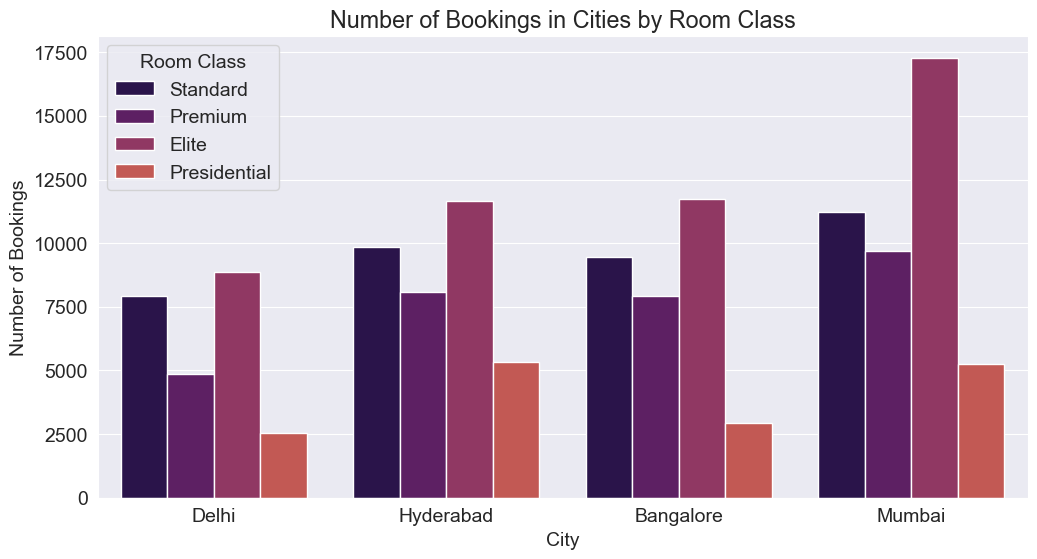

In [64]:
sns.countplot(data=bookings_df, x='City', hue='Room Class')

plt.title('Number of Bookings in Cities by Room Class')
plt.ylabel('Number of Bookings')
plt.show()

### Observations:

##### Variation across hotels, room classes, cities, and day types:

- **Assumption 5 is Confirmed.** There are `significant variations` in booking numbers across these categories, as seen in the plots.


##### Luxury vs. Business hotels:

- **Assumption 5 is Partially confirmed.** `Luxury hotels` (Atliq Grands, Atliq Bay, Atliq Blu) generally have `fewer bookings` compared to business hotels (Atliq Palace, Atliq City), with Atliq Exotica being an exception due to having two properties in Mumbai.


##### Weekend vs. Weekday bookings:

- **Assumption 5 is Confirmed.** The plot shows that `weekend days (Saturday, Sunday)` generally have `higher booking numbers` than weekdays for most hotels.


##### City influence:

- **Assumption 5 is Confirmed.** The presence of hotels in different cities significantly affects booking numbers. Mumbai has the most bookings.


##### Hotel distribution impact:

- **Assumption 5 is Partially Confirmed.** `Atliq Exotica's higher booking numbers` are attributed to having `two properties in Mumbai`, showing how hotel distribution across cities affects overall bookings.


##### Occupancy rates:

- **Assumption 5 is Not confirmed.** We can see occupancy rates for hotels `don't directly correlate` with the total number of bookings.


##### Luxury hotel booking value:

- **Assumption 5 is Confirmed.** The occupancy rate for `Presidential rooms in luxury hotels` is consistently higher than other room types.


##### Room class impact:

- **Assumption 5 is Confirmed.** The number of bookings for `Presidential` rooms in all hotels is consistently `higher` than other room types.

In [65]:
# Revenue generated hotel class, room class, city pie chart

### Assumption 6:

**Given that Altiq Palace, Altiq Exotica, and Altiq City have the highest bookings, especially in Mumbai, these hotels are likely the top revenue generators. Additionally, revenue from other Mumbai hotels should surpass those in other cities. Most bookings are for Elite rooms, followed by Standard, Premium, and Presidential, so their revenue should follow this pattern.**

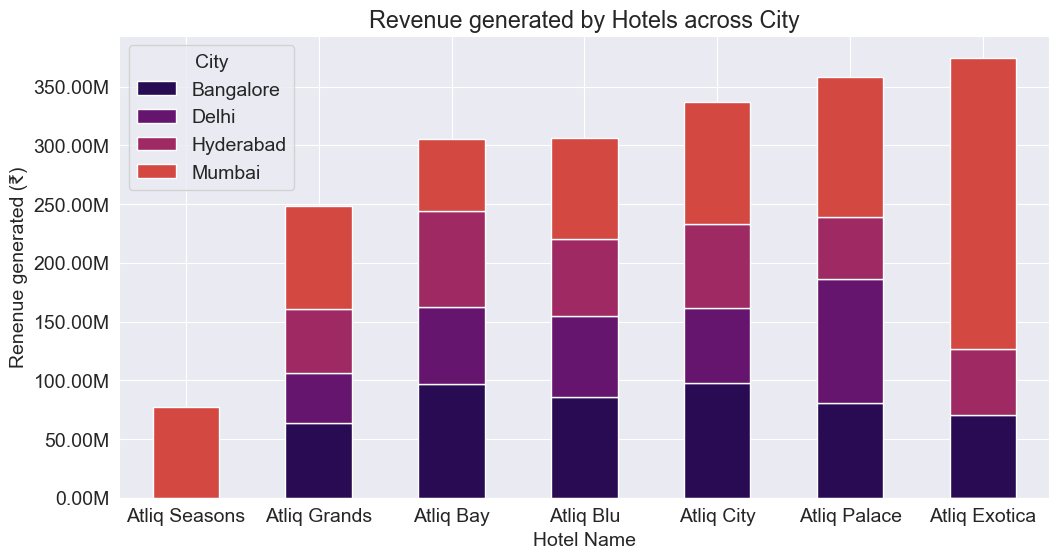

In [66]:
# Hotel-City, revenue pivot

hotel_revenue = bookings_df.pivot_table(values='Revenue Generated', index='Hotel Name', columns='City', aggfunc='sum').fillna(0)


# Sort hotels by total revenue

hotel_revenue = hotel_revenue.loc[hotel_revenue.sum(axis=1).sort_values(ascending=True).index]


# Plot
hotel_revenue.plot(kind='bar', stacked=True)

plt.title('Revenue generated by Hotels across City')
plt.ylabel('Renenue generated (₹)')
yformat()
plt.xticks(rotation=0)
plt.legend(title='City')
plt.show()

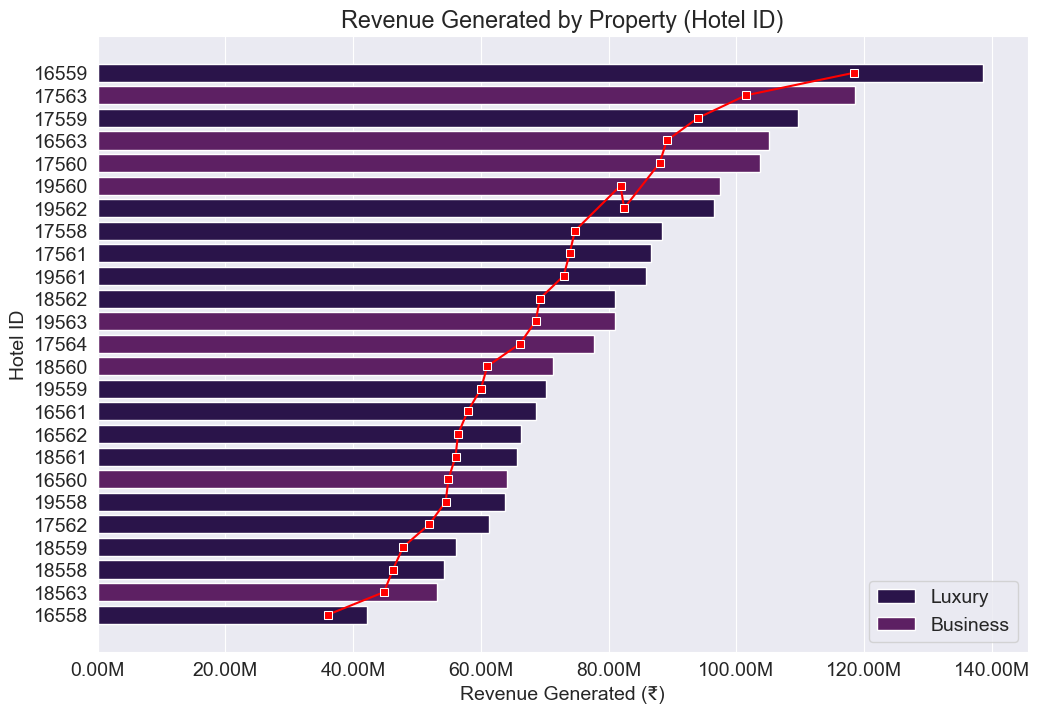

In [67]:
# Revenue Generated by individual hotels

revenue_id = bookings_df.groupby(['Hotel ID', 'Hotel Name', 'Hotel Class', 'City'])[['Revenue Generated', 'Revenue Realized']].sum().reset_index()


# Convert Hotel ID to str and sort by Revenue Generated

revenue_id['Hotel ID'] = revenue_id['Hotel ID'].astype(str)
revenue_id.sort_values('Revenue Generated', ascending=False, inplace=True)


# Plot

plt.figure(figsize=(12,8))

# Revenue Generated

sns.barplot(data=revenue_id, x='Revenue Generated', y='Hotel ID', hue='Hotel Class')


# Revenue Realized

sns.lineplot(data=revenue_id, x='Revenue Realized', y='Hotel ID', color='r', marker='s')

plt.xlabel('Revenue Generated (₹)')
plt.title('Revenue Generated by Property (Hotel ID)')
xformat()
plt.show()

In [68]:
# Top 5 property, Revenue generated 

revenue_id.head(5)

Hotel ID     Hotel Name Hotel Class    City  Revenue Generated  \
1     16559  Atliq Exotica      Luxury  Mumbai          138698580   
11    17563   Atliq Palace    Business  Mumbai          118616735   
7     17559  Atliq Exotica      Luxury  Mumbai          109696920   
5     16563   Atliq Palace    Business   Delhi          105200620   
8     17560     Atliq City    Business  Mumbai          103776330   

    Revenue Realized  
1          118448418  
11         101511080  
7           93996570  
5           89135998  
8           87996216

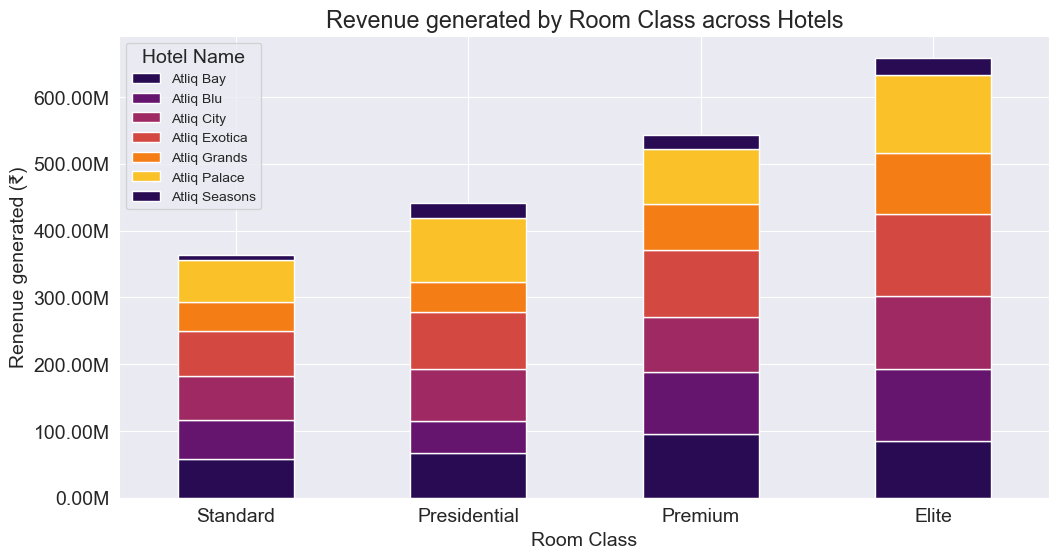

In [69]:
# Hotel-Room Class, revenue pivot

room_revenue = bookings_df.pivot_table(values='Revenue Generated', index='Room Class', columns='Hotel Name', aggfunc='sum').fillna(0)


# Sort room class by total revenue

room_revenue = room_revenue.loc[room_revenue.sum(axis=1).sort_values(ascending=True).index]


# Plot
room_revenue.plot(kind='bar', stacked=True)

plt.title('Revenue generated by Room Class across Hotels')
plt.ylabel('Renenue generated (₹)')
yformat()
plt.xticks(rotation=0)
plt.legend(title='Hotel Name', fontsize=10)
plt.show()

### Observations:

**Assumption 6**

**The top 5 revenue-generating properties:**
1. Altiq Exotica-16559 (Mumbai): ₹138,698,580
2. Altiq Palace-17563 (Mumbai): ₹118,616,735
3. Altiq Exotica-17559 (Mumbai): ₹106,969,920
4. Altiq Palace-16563 (Delhi): ₹105,200,620
5. Altiq City-17560 (Mumbai): ₹103,776,330

**This confirms that Altiq Palace, Altiq Exotica, and Altiq City are indeed among the top revenue generators, especially in Mumbai.**

**Mumbai hotels surpassing other cities:**
- The top 5 list shows that `4 out of 5 highest` revenue-generating properties are in `Mumbai`, with only one in Delhi. **This supports the assumption that Mumbai hotels generally outperform those in other cities.**

**Room class revenue pattern:**
<br>
**Contrary to the assumption**, the actual order from highest to lowest revenue is:
- **Elite > Premium > Presidential > Standard** 
- This can be due to pricing strategy for different room class.

### Assumption 7:

**Top revenue-generating properties are expected to have higher occupancy rates, superior revenue metrics (ADR, RevPAR, and RRPR), and better customer ratings. Additionally, these properties are expected to experience lower cancellation rates compared to others.**

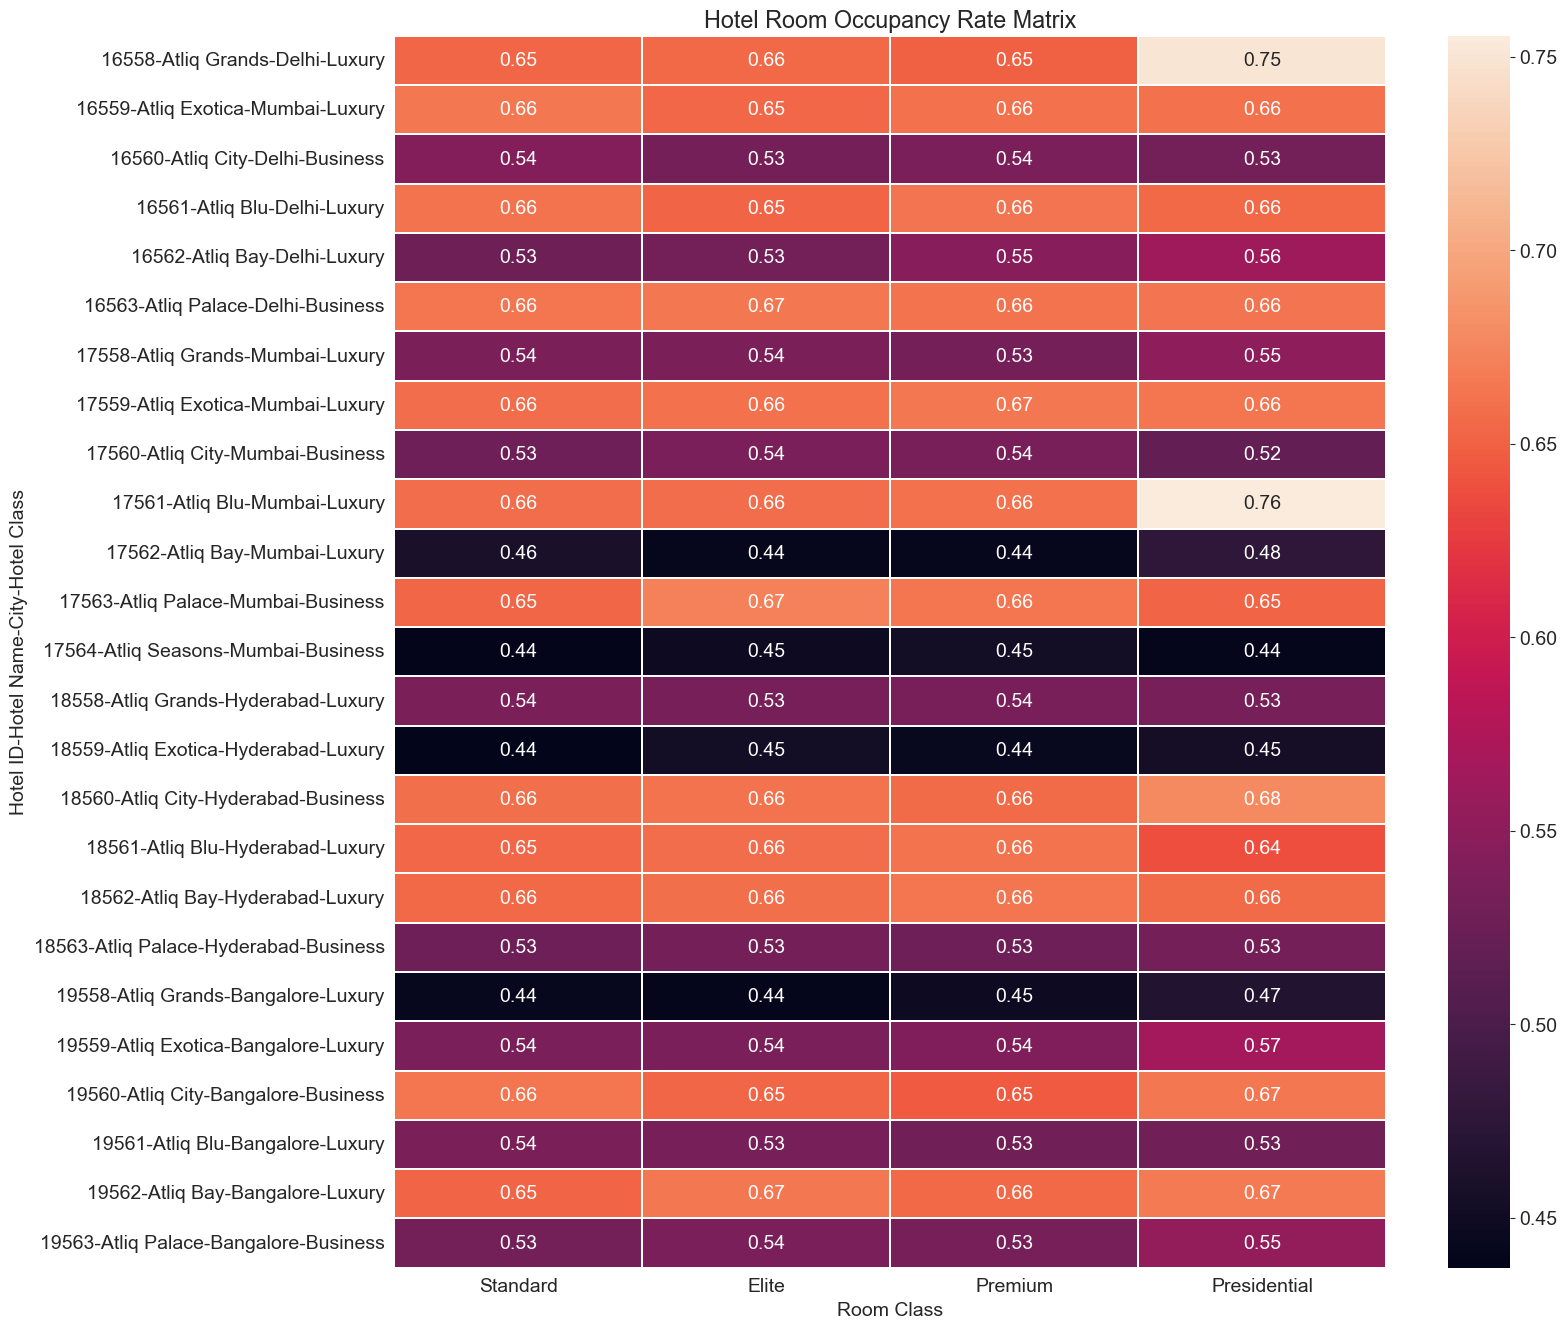

In [70]:
# Hotel room occupancy capacity matrix

occupancy_matrix = aggregated_df.groupby(['Hotel ID', 'Hotel Name', 'City', 'Hotel Class', 'Room Class'])['Occupancy Rate'].mean().unstack()

# Matrix, by room class order

occupancy_matrix = occupancy_matrix[room_class_order]


# Plot

plt.figure(figsize=(16, 16))
sns.heatmap(occupancy_matrix, annot=True, fmt=".2f", linewidth=0.01)

plt.title('Hotel Room Occupancy Rate Matrix')
plt.show()

### Observations:

**Despite having the highest number of bookings and revenue generated, some hotels in Mumbai, such as Altiq Bay and Altiq Seasons, still exhibit very low occupancy rates.**

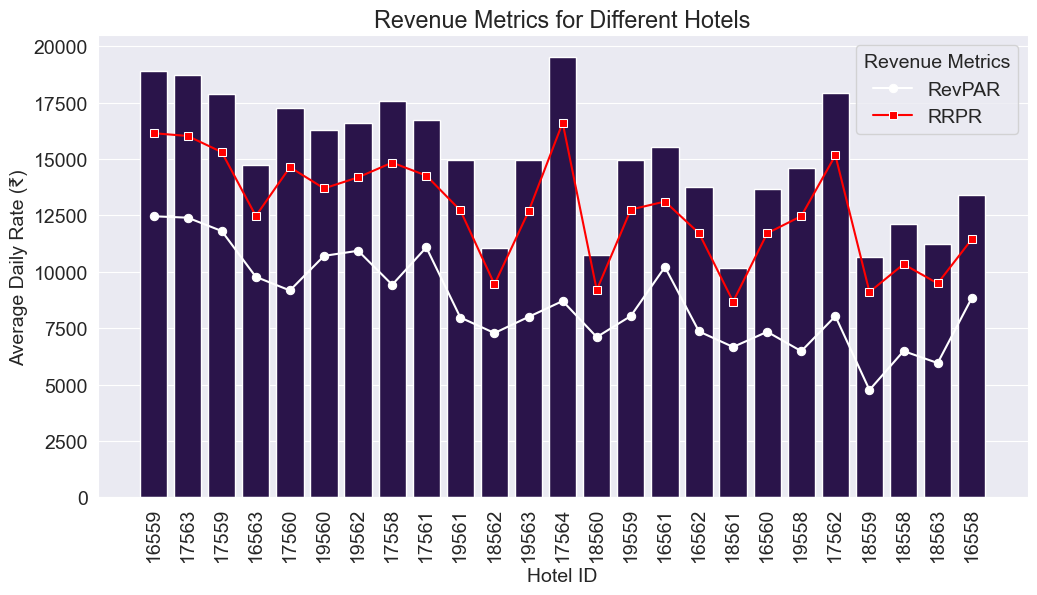

In [71]:
# Revenue metrics, property

# Hotels: total rooms, and booked rooms

hotel_rooms = aggregated_df.groupby('Hotel ID')[['Booked Rooms', 'Total Room Capacity']].sum().reset_index()
hotel_rooms['Hotel ID'] = hotel_rooms['Hotel ID'].astype(str)


# Merge with revenue for hotels, revenue_id

metric_id = pd.merge(hotel_rooms, revenue_id, on='Hotel ID')


# Average daily rate

metric_id['Average Daily Rate'] = metric_id['Revenue Generated'] / metric_id['Booked Rooms']


# Revenue per available room

metric_id['Revenue per Available Room'] = metric_id['Revenue Generated'] / metric_id['Total Room Capacity']


# Revenue realized per room

metric_id['Revenue Realized per Room'] = metric_id['Revenue Realized'] / metric_id['Booked Rooms']


# Sort values by Revenue Generated

metric_id.sort_values('Revenue Generated', ascending=False, inplace=True)


# Metrics Plot


# Bar plot: Average Daily Rate

sns.barplot(data=metric_id, y='Average Daily Rate', x='Hotel ID')


# Line plot: Revenue per Available Room

sns.lineplot(data=metric_id, y='Revenue per Available Room', x='Hotel ID', color='w', marker='o', label='RevPAR')


# Line plot: Revenue Realized per Room

sns.lineplot(data=metric_id, y='Revenue Realized per Room', x='Hotel ID', color='r', marker='s', label='RRPR')


plt.title('Revenue Metrics for Different Hotels')
plt.legend(title='Revenue Metrics', loc='upper right')
plt.xticks(rotation=90)
plt.ylabel('Average Daily Rate (₹)')
plt.show()

In [72]:
# Top 5 property, average daily rate

metric_id.sort_values('Average Daily Rate', ascending=False, inplace=True)
metric_id.head(5)

Hotel ID  Booked Rooms  Total Room Capacity     Hotel Name Hotel Class  \
12    17564          3982                 8924  Atliq Seasons    Business   
1     16559          7338                11132  Atliq Exotica      Luxury   
11    17563          6337                 9568   Atliq Palace    Business   
10    17562          3424                 7636      Atliq Bay      Luxury   
7     17559          6142                 9292  Atliq Exotica      Luxury   

      City  Revenue Generated  Revenue Realized  Average Daily Rate  \
12  Mumbai           77665265          66125495            19504.08   
1   Mumbai          138698580         118448418            18901.41   
11  Mumbai          118616735         101511080            18718.12   
10  Mumbai           61333960          51914158            17912.96   
7   Mumbai          109696920          93996570            17860.13   

    Revenue per Available Room  Revenue Realized per Room  
12                     8702.97                   16606.10  
1                     12459.45                   16141.78  
11                    12397.23                   16018.79  
10                     8032.21                   15161.85  
7                     11805.52                   15303.90

In [73]:
# Bottom 5 property, average daily rate

metric_id.tail(5)

Hotel ID  Booked Rooms  Total Room Capacity     Hotel Name Hotel Class  \
18    18563          4728                 8924   Atliq Palace    Business   
17    18562          7333                11132      Atliq Bay      Luxury   
15    18560          6638                10028     Atliq City    Business   
14    18559          5256                11776  Atliq Exotica      Luxury   
16    18561          6458                 9844      Atliq Blu      Luxury   

         City  Revenue Generated  Revenue Realized  Average Daily Rate  \
18  Hyderabad           53133300          44838780            11238.01   
17  Hyderabad           81067000          69255910            11055.09   
15  Hyderabad           71246500          61007200            10733.13   
14  Hyderabad           56049500          47844020            10663.91   
16  Hyderabad           65615250          56040450            10160.31   

    Revenue per Available Room  Revenue Realized per Room  
18                     5953.98                    9483.67  
17                     7282.34                    9444.42  
15                     7104.76                    9190.60  
14                     4759.64                    9102.74  
16                     6665.51                    8677.68

### Observations: 
**Mumbai Hotels Dominate the Top 5:** `All the top 5 hotels based on revenue metrics`, including Average Daily Rate (ADR) and Revenue per Available Room (RevPAR), are `located in Mumbai`. These properties, such as Atliq Seasons, Atliq Exotica, and Atliq Palace, have high ADRs and RevPARs, indicating strong financial performance.

**Hyderabad Hotels Rank Lower:** Conversely, `the bottom 5 hotels in terms of revenue metrics are all located in Hyderabad`. These hotels, including Atliq Palace, Atliq Bay, and Atliq City, have significantly lower ADRs and RevPARs compared to their Mumbai counterparts, reflecting weaker financial performance.

* **Top hotels in Mumbai have higher booking volumes and rates, driving superior revenue performance, indicating strong demand for premium services.**
* **Hyderabad hotels generate lower revenue per room, suggesting lower rates or market demand compared to Mumbai, despite decent occupancy.**

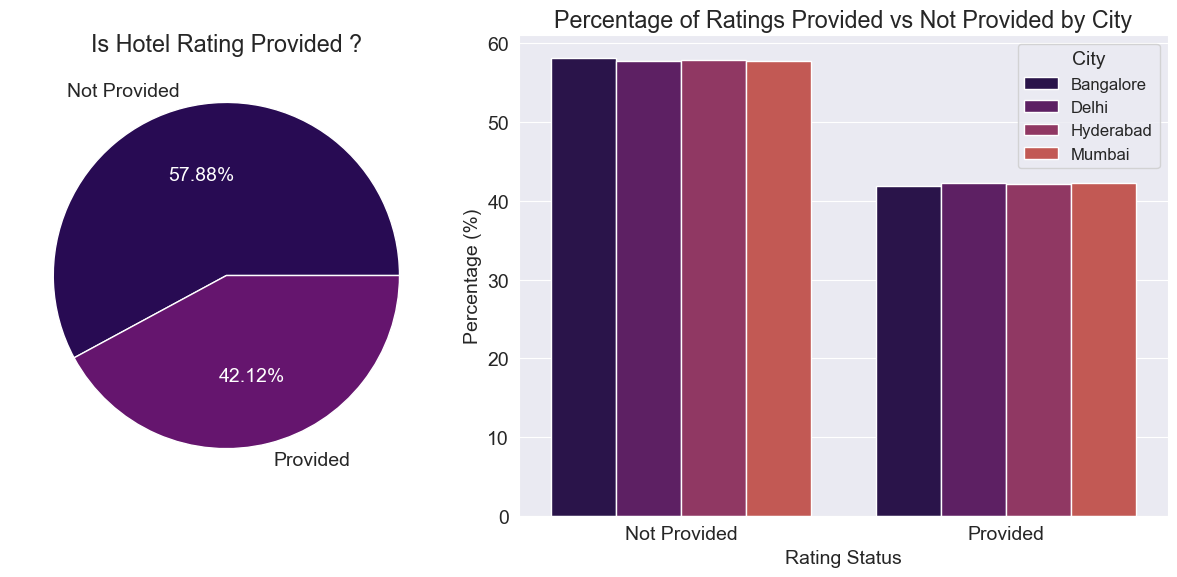

In [74]:
# Ratings Provided ?

# Function to format percentage labels with white text
def custom_autopct(pct):
    return f'{pct:.2f}%'


fig = plt.figure()

# Define grid layout with two subplots
gs = fig.add_gridspec(1, 2, width_ratios=[0.4, 0.6])

# Plot, ratings provided ?

ax1 = fig.add_subplot(gs[0])
wedges, texts, autotexts = ax1.pie(bookings_df['IsRating Provided'].value_counts(), labels=['Not Provided', 'Provided'], autopct=custom_autopct, startangle=0)

# Set percentage text to white
for autotext in autotexts:
    autotext.set_color('white')

ax1.set_title('Is Hotel Rating Provided ?')



# Calculate percentage of ratings provided by city

percentage_ratings = (bookings_df.groupby('City')['IsRating Provided'].value_counts() / bookings_df['City'].value_counts()) * 100
percentage_ratings = percentage_ratings.reset_index(name='Percentage')

# Is Ratings provided  by city

ax2 = fig.add_subplot(gs[1])
sns.barplot(data=percentage_ratings, x='IsRating Provided', y='Percentage', hue='City', ax=ax2)

ax2.set_title('Percentage of Ratings Provided vs Not Provided by City')
ax2.set_ylabel('Percentage (%)')
ax2.set_xlabel('Rating Status')
ax2.legend(title='City', loc='upper right', fontsize=12)
ax2.set_xticks([0, 1])
ax2.set_xticklabels(['Not Provided', 'Provided'])

plt.tight_layout()
plt.show()

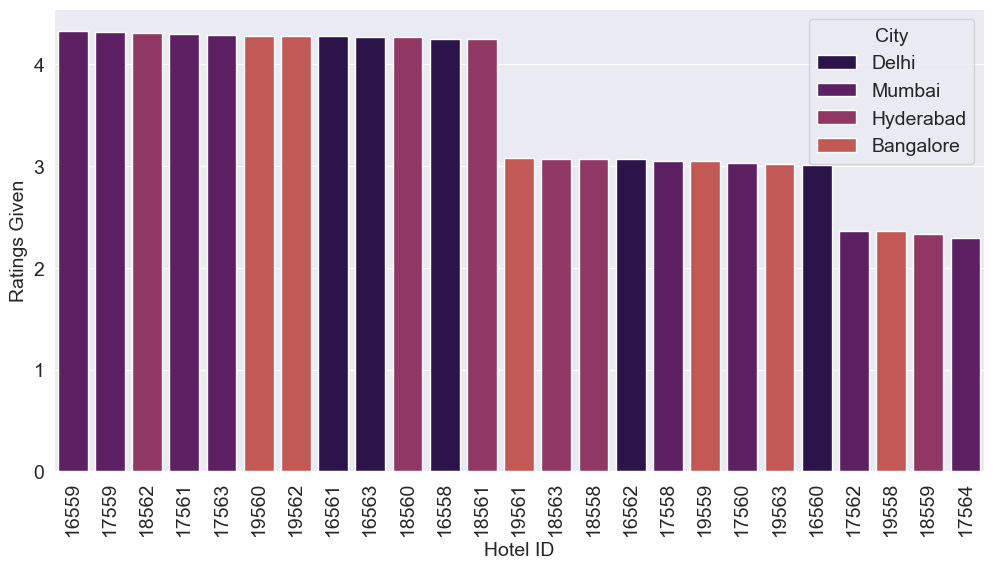

In [75]:
# Hotel Ratings

ratings = bookings_df.groupby(['Hotel ID', 'Hotel Name', 'Hotel Class', 'City'])['Ratings Given'].mean().reset_index()

ratings.sort_values('Ratings Given', ascending=False, inplace=True)


# Plot

sns.barplot(data=ratings, x='Hotel ID', y='Ratings Given', hue='City', order=ratings['Hotel ID'])

plt.xticks(rotation=90)
plt.show()

### Observations:

**Mumbai's Strong Presence at the Top:**
* The `top-rated hotels` predominantly come from `Mumbai`, with both luxury and business-class hotels performing well, highlighting the city's ability to satisfy customers across different hotel classes.
  
**Mixed Performance Across Cities:** 
* Hotels from Mumbai, Hyderabad, Bangalore, and Delhi are scattered across both the top and bottom of the ratings.  This shows that customer satisfaction challenges are not confined to one city but are spread across different locations.
  
**Room for Improvement:** 
* The presence of both luxury and business hotels in the bottom 5, across various cities, suggests that `some properties may need to reassess their service quality`, regardless of their class or location.

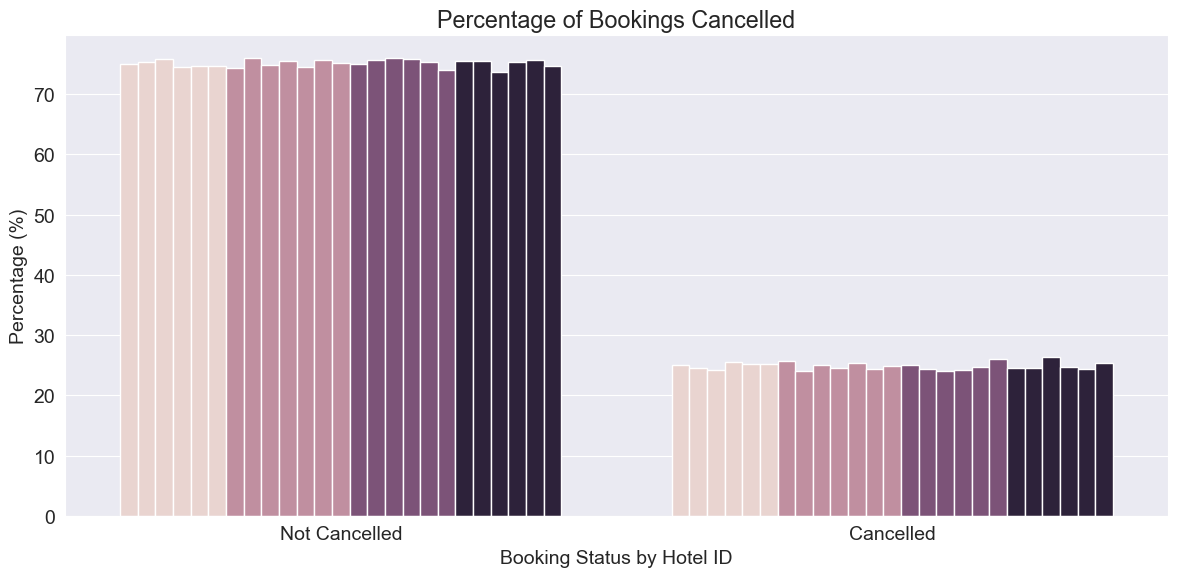

In [76]:
# Add new Feature, IsCancelled : This feature is a boolean indicator that shows whether a booking was cancelled.

bookings_df['IsCancelled'] = bookings_df['Booking Status'].apply(lambda status: status == 'Cancelled')


# Calculate percentage cancelled by hotels

percentage_cancelled = (bookings_df.groupby('Hotel ID')['IsCancelled'].value_counts() / bookings_df['Hotel ID'].value_counts()) * 100
percentage_cancelled = percentage_cancelled.reset_index(name='Percentage')


plt.figure(figsize=(12, 6))
sns.barplot(data=percentage_cancelled, x='IsCancelled', y='Percentage', hue='Hotel ID')

plt.title('Percentage of Bookings Cancelled')
plt.ylabel('Percentage (%)')
plt.xlabel('Booking Status by Hotel ID')
plt.legend().remove()
plt.xticks([0, 1], labels=['Not Cancelled', 'Cancelled'])

plt.tight_layout()
plt.show()

In [77]:
percentage_cancelled

Hotel ID  IsCancelled  Percentage
0      16558        False       74.94
1      16558         True       25.06
2      16559        False       75.39
3      16559         True       24.61
4      16560        False       75.88
5      16560         True       24.12
6      16561        False       74.49
7      16561         True       25.51
8      16562        False       74.73
9      16562         True       25.27
10     16563        False       74.74
11     16563         True       25.26
12     17558        False       74.34
13     17558         True       25.66
14     17559        False       75.99
15     17559         True       24.01
16     17560        False       74.94
17     17560         True       25.06
18     17561        False       75.48
19     17561         True       24.52
20     17562        False       74.56
21     17562         True       25.44
22     17563        False       75.62
23     17563         True       24.38
24     17564        False       75.21
25     17564         True       24.79
26     18558        False       75.02
27     18558         True       24.98
28     18559        False       75.65
29     18559         True       24.35
30     18560        False       75.97
31     18560         True       24.03
32     18561        False       75.83
33     18561         True       24.17
34     18562        False       75.30
35     18562         True       24.70
36     18563        False       74.05
37     18563         True       25.95
38     19558        False       75.45
39     19558         True       24.55
40     19559        False       75.52
41     19559         True       24.48
42     19560        False       73.62
43     19560         True       26.38
44     19561        False       75.35
45     19561         True       24.65
46     19562        False       75.67
47     19562         True       24.33
48     19563        False       74.65
49     19563         True       25.35

### Observations:

**Assumption 7**

##### Top 5 Revenue-Generating Properties:
- Atliq Exotica (Mumbai, Luxury)
- Atliq Palace (Mumbai, Business)
- Atliq Exotica (Mumbai, Luxury)
- Atliq Palace (Delhi, Business)
- Atliq City (Mumbai, Business)


**Occupancy Rates:** 
The top 5 properties generally have `occupancy rates between 0.65 to 0.67`, which are `higher or comparable` to other properties, **confirming the expectation of higher occupancy rates.**

**Revenue Metrics:**
- ADR (Average Daily Rate): The top properties have `higher ADR` values, with Atliq Exotica (Mumbai) leading at 18901.41.
- RevPAR (Revenue per Available Room): The top properties also exhibit `high RevPAR values`, with Atliq Exotica (Mumbai) again leading.
- RRPR (Revenue Realized per Room): Similarly, the top properties show `strong performance in RRPR`.

**Customer Ratings:**
- Given that `ratings` are only `provided 42.12%` of the time while `57.88% do not`. This limited data makes it challenging to draw definitive conclusions about all properties.
- `Atliq Exotica (Mumbai)` and `Atliq Palace (Mumbai)` have ratings of `4.32` and `4.29`, respectively, placing them among the higher-rated properties.
- **These ratings align with the assumption of better customer ratings for top revenue generators.**

**Cancellation Rates:**
- Cancellation rates for `top properties` like Atliq Exotica (Mumbai) and Atliq Palace (Mumbai) are `around 24%`, which is `slightly lower than the average` across all properties, **weekly supporting the expectation of lower cancellation rates.**

**Assumption 7 holds true. The top revenue-generating properties do exhibit higher occupancy rates, superior revenue metrics, better customer ratings, and lower cancellation rates compared to other properties.**

In [207]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [79]:
df = bookings_df.copy()

In [80]:
df['HotelName-City'] = df['Hotel Name'] + '-' + df['City']
df['HotelName-RoomClass'] = df['Hotel Name'] + '-' + df['Room Class']

In [81]:
train_end_date = '2022-07-15'

In [82]:
train_df = df[df['Check-In Date'] <= train_end_date]
test_df = df[df['Check-In Date'] > train_end_date]

print(f'Training dataset shape: {train_df.shape}')
print(f'Test dataset shape: {test_df.shape}')

Training dataset shape: (112881, 27)
Test dataset shape: (21709, 27)


In [83]:
train_df.head()

Booking ID Booking Date Check-In Date Check-Out Date  \
0     May012216558RT11   2022-04-27    2022-05-01     2022-05-02   
1345  May012218562RT34   2022-04-27    2022-05-01     2022-05-02   
1344  May012218562RT33   2022-04-27    2022-05-01     2022-05-02   
1343  May012218562RT32   2022-04-28    2022-05-01     2022-05-06   
1342  May012218562RT31   2022-04-28    2022-05-01     2022-05-02   

      Booking LeadTime Hotel ID    Hotel Name Hotel Class       City  Year  \
0                    4    16558  Atliq Grands      Luxury      Delhi  2022   
1345                 4    18562     Atliq Bay      Luxury  Hyderabad  2022   
1344                 4    18562     Atliq Bay      Luxury  Hyderabad  2022   
1343                 3    18562     Atliq Bay      Luxury  Hyderabad  2022   
1342                 3    18562     Atliq Bay      Luxury  Hyderabad  2022   

     Month  Week Number Day Type DayOfWeek Check-In DayOfWeek Check-Out  \
0      May           19  weekend             Sunday              Monday   
1345   May           19  weekend             Sunday              Monday   
1344   May           19  weekend             Sunday              Monday   
1343   May           19  weekend             Sunday              Friday   
1342   May           19  weekend             Sunday              Monday   

     Room Class  Number Of Guests  Stay Duration Booking Platform  \
0      Standard                 3              1    direct online   
1345    Premium                 4              1     makeyourtrip   
1344    Premium                 2              1     makeyourtrip   
1343    Premium                 2              5          logtrip   
1342    Premium                 2              1           others   

      IsRating Provided  Ratings Given Booking Status  Revenue Generated  \
0                  True           1.00    Checked Out              10010   
1345               True           5.00    Checked Out              14400   
1344              False            NaN    Checked Out              12000   
1343              False            NaN    Checked Out              12000   
1342              False            NaN      Cancelled              12000   

      Revenue Realized  IsCancelled       HotelName-City  \
0                10010        False   Atliq Grands-Delhi   
1345             14400        False  Atliq Bay-Hyderabad   
1344             12000        False  Atliq Bay-Hyderabad   
1343             12000        False  Atliq Bay-Hyderabad   
1342              4800         True  Atliq Bay-Hyderabad   

        HotelName-RoomClass  
0     Atliq Grands-Standard  
1345      Atliq Bay-Premium  
1344      Atliq Bay-Premium  
1343      Atliq Bay-Premium  
1342      Atliq Bay-Premium

In [240]:
input_cols = ['Hotel Name', 'City', 'Room Class', 'HotelName-City', 'HotelName-RoomClass', 'Number Of Guests', 'Day Type', 'Stay Duration']
target_col = 'Revenue Generated'

In [241]:
train_inputs, train_target = train_df[input_cols].copy(), train_df[target_col].copy()
test_inputs, test_target = test_df[input_cols].copy(), test_df[target_col].copy()

In [242]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [243]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])

encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [244]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [245]:
X_train.head()

Number Of Guests  Stay Duration  Hotel Name_Atliq Bay  \
0                    3              1                  0.00   
1345                 4              1                  1.00   
1344                 2              1                  1.00   
1343                 2              5                  1.00   
1342                 2              1                  1.00   

      Hotel Name_Atliq Blu  Hotel Name_Atliq City  Hotel Name_Atliq Exotica  \
0                     0.00                   0.00                      0.00   
1345                  0.00                   0.00                      0.00   
1344                  0.00                   0.00                      0.00   
1343                  0.00                   0.00                      0.00   
1342                  0.00                   0.00                      0.00   

      Hotel Name_Atliq Grands  Hotel Name_Atliq Palace  \
0                        1.00                     0.00   
1345                     0.00                     0.00   
1344                     0.00                     0.00   
1343                     0.00                     0.00   
1342                     0.00                     0.00   

      Hotel Name_Atliq Seasons  City_Bangalore  City_Delhi  City_Hyderabad  \
0                         0.00            0.00        1.00            0.00   
1345                      0.00            0.00        0.00            1.00   
1344                      0.00            0.00        0.00            1.00   
1343                      0.00            0.00        0.00            1.00   
1342                      0.00            0.00        0.00            1.00   

      City_Mumbai  Room Class_Elite  Room Class_Premium  \
0            0.00              0.00                0.00   
1345         0.00              0.00                1.00   
1344         0.00              0.00                1.00   
1343         0.00              0.00                1.00   
1342         0.00              0.00                1.00   

      Room Class_Presidential  Room Class_Standard  \
0                        0.00                 1.00   
1345                     0.00                 0.00   
1344                     0.00                 0.00   
1343                     0.00                 0.00   
1342                     0.00                 0.00   

      HotelName-City_Atliq Bay-Bangalore  HotelName-City_Atliq Bay-Delhi  \
0                                   0.00                            0.00   
1345                                0.00                            0.00   
1344                                0.00                            0.00   
1343                                0.00                            0.00   
1342                                0.00                            0.00   

      HotelName-City_Atliq Bay-Hyderabad  HotelName-City_Atliq Bay-Mumbai  \
0                                   0.00                             0.00   
1345                                1.00                             0.00   
1344                                1.00                             0.00   
1343                                1.00                             0.00   
1342                                1.00                             0.00   

      HotelName-City_Atliq Blu-Bangalore  HotelName-City_Atliq Blu-Delhi  \
0                                   0.00                            0.00   
1345                                0.00                            0.00   
1344                                0.00                            0.00   
1343                                0.00                            0.00   
1342                                0.00                            0.00   

      HotelName-City_Atliq Blu-Hyderabad  HotelName-City_Atliq Blu-Mumbai  \
0                                   0.00                             0.00   
1345                                0.00                             0.00   
1344                                0.00      

In [230]:
alpha_values = [0.1, 1.0, 10.0, 100.0, 1000.0]

In [231]:
ridge = Ridge()
param_grid = {'alpha': alpha_values}
grid_search = GridSearchCV(ridge, param_grid, cv=5)

In [232]:
grid_search.fit(X_train, train_target)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']

print(f"Best alpha value: {best_alpha}")

Best alpha value: 0.1


In [246]:
model = Ridge(alpha=0.1).fit(X_train, train_target)

In [247]:
train_preds = model.predict(X_train)

In [248]:
mean_squared_error(train_preds, train_target, squared=False)

1277.9695761427447

In [255]:
weights_df = pd.DataFrame({
    'feature': np.append(X_train.columns, 'intercept'),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False, inplace=True)

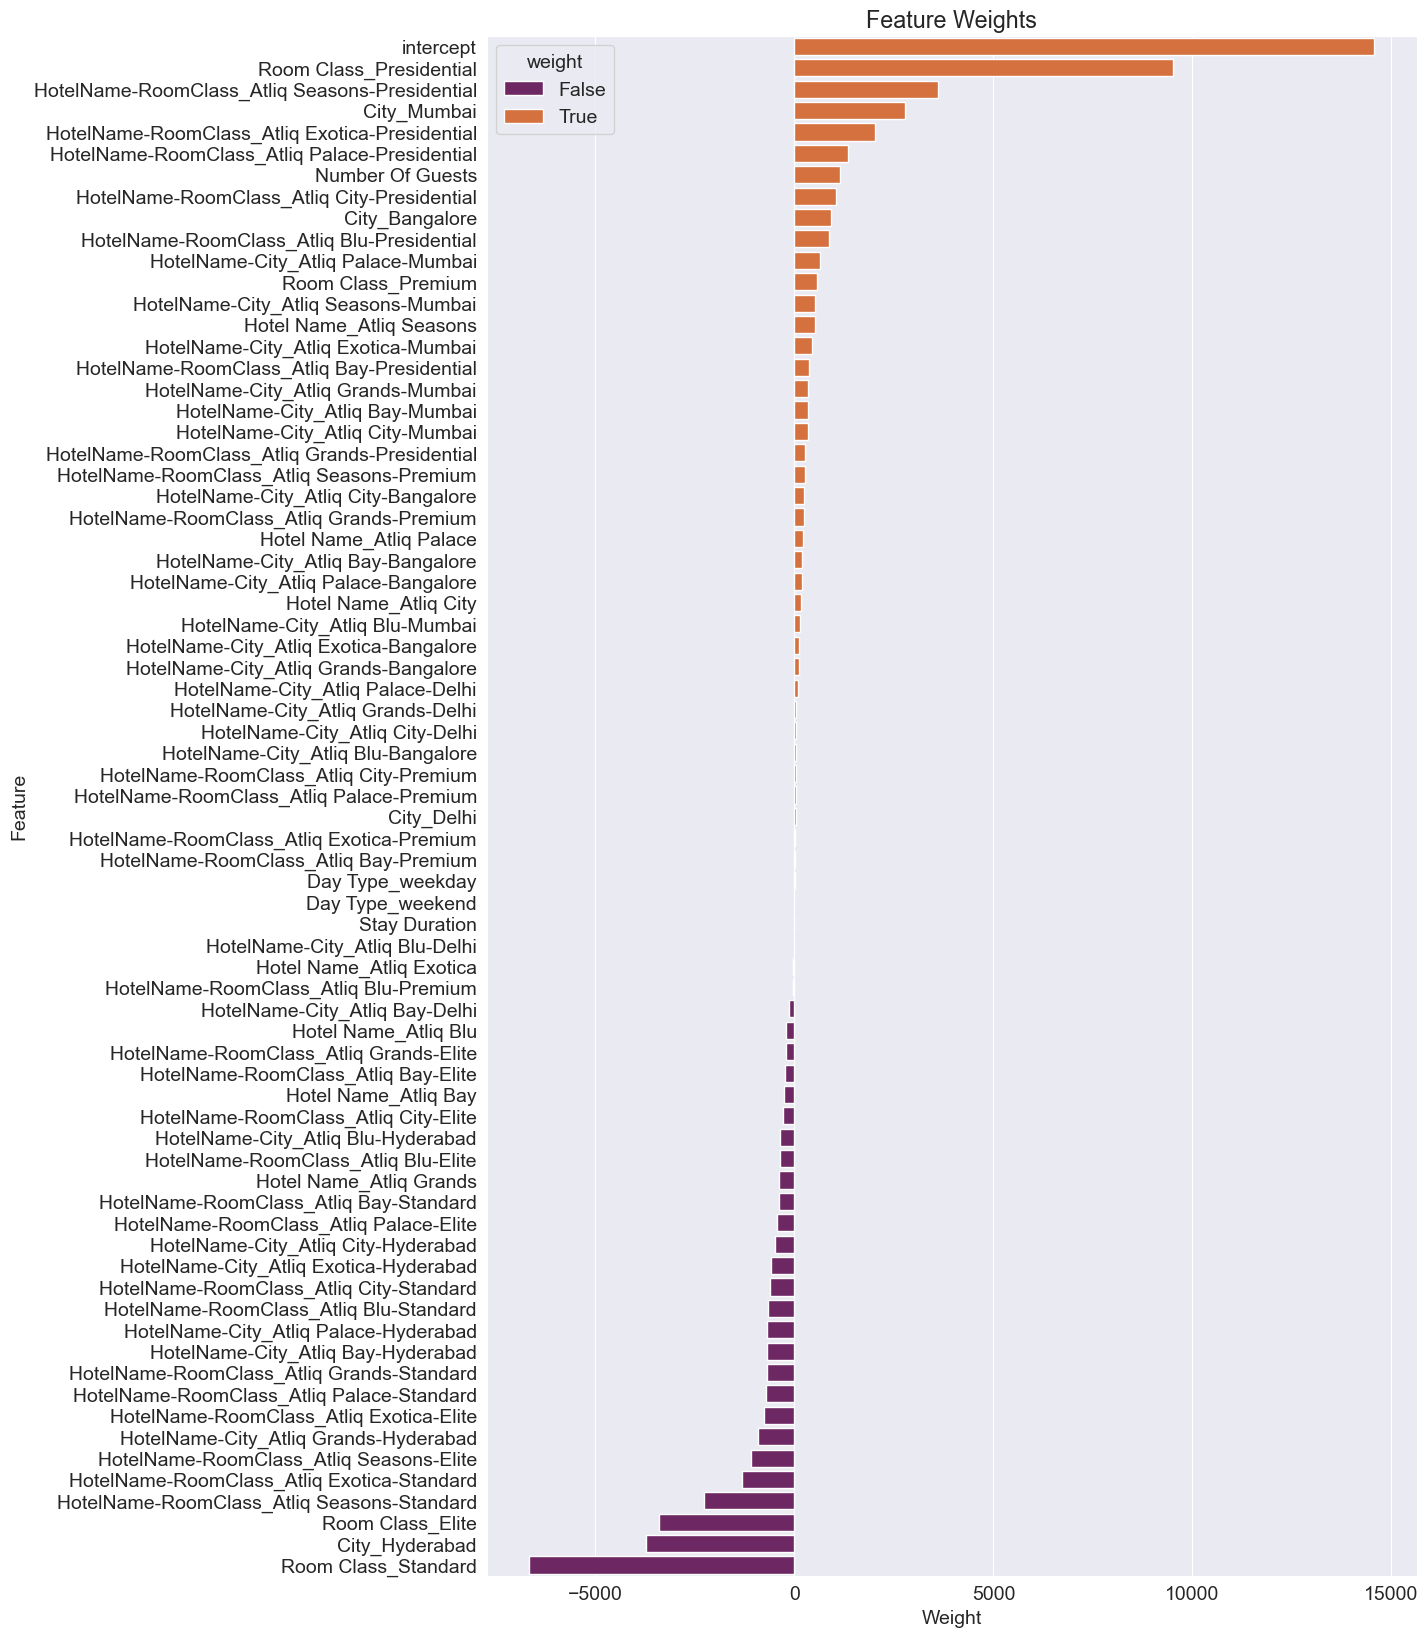

In [256]:
# Create a bar plot
plt.figure(figsize=(12, 20))
sns.barplot(data=weights_df, x='weight', y='feature', hue=(weights_df['weight'] > 0 ), palette=sns.color_palette('inferno', n_colors=2))

# Add labels and title
plt.xlabel('Weight')
plt.ylabel('Feature')
plt.title('Feature Weights')

# Show plot
plt.show()

In [237]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df['HotelName-City'] = input_df['Hotel Name'] + '-' + input_df['City']
    input_df['HotelName-RoomClass'] = input_df['Hotel Name'] + '-' + input_df['Room Class']
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)
    return pred

In [257]:
new_input = {'Hotel Name': 'Atliq Palace',
             'City': 'Delhi',
             'Room Class': 'Standard',
             'Number Of Guests': 3,
             'Day Type': 'weekend',
             'Stay Duration': 4}

In [258]:
predict_input(new_input)

array([10934.01715593])

In [218]:
def filter_bookings(df, hotel_name, city, room_class, num_guests, day_type, stay_duration):
    filtered_df = df[
        (df['Hotel Name'] == hotel_name) &
        (df['City'] == city) &
        (df['Room Class'] == room_class) &
        (df['Number Of Guests'] == num_guests) &
        (df['Day Type'] == day_type) &
        (df['Stay Duration'] == stay_duration)
    ]
    return filtered_df

In [219]:
filter_bookings(bookings_df, 'Atliq Palace', 'Delhi', 'Standard', 3, 'weekend', 4)

Booking ID Booking Date Check-In Date Check-Out Date  \
104268  Jul102216563RT124   2022-07-08    2022-07-10     2022-07-14   

        Booking LeadTime Hotel ID    Hotel Name Hotel Class   City  Year  \
104268                 2    16563  Atliq Palace    Business  Delhi  2022   

       Month  Week Number Day Type DayOfWeek Check-In DayOfWeek Check-Out  \
104268  July           29  weekend             Sunday            Thursday   

       Room Class  Number Of Guests  Stay Duration Booking Platform  \
104268   Standard                 3              4    direct online   

        IsRating Provided  Ratings Given Booking Status  Revenue Generated  \
104268               True           3.00    Checked Out              10010   

        Revenue Realized  IsCancelled  
104268             10010        False

In [220]:
new_input = {'Hotel Name': 'Atliq Grands',
             'City': 'Delhi',
             'Room Class': 'Standard',
             'Number Of Guests': 3,
             'Day Type': 'weekend',
             'Stay Duration': 1}

In [221]:
predict_input(new_input)

array([10345.17699618])

In [223]:
filter_bookings(bookings_df, 'Atliq Grands', 'Delhi', 'Standard', 3, 'weekend', 1)['Revenue Generated'].mean()

10010.0